In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
import xgboost

c:\users\jhkim6\pycharmprojects\gc\venv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [4]:
from joblib import dump, load

In [5]:
import json

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})
import sklearn

# 마이너스 부호 깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# row 출력제한 해제
pd.set_option('display.max_row', 500)

# column 출력제한 해제
pd.set_option('display.max_columns', 100)

In [8]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
from impyute.imputation.cs import mice, fast_knn

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from itertools import product
from scipy.stats import gaussian_kde
from scipy import stats

In [12]:
# import keras
# from keras import layers
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping

In [13]:
# import torch 
# from torch import nn,optim
# from torch.utils.data import DataLoader, Dataset
# import torch.nn.functional as F

# Data Load

In [14]:
with open('../input/DM_건강검진결과_토탈_피봇241014.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw = pd.DataFrame(js)

In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Columns: 136 entries, 검진년도 to 심장주위지방CT
dtypes: int64(4), object(132)
memory usage: 1.2+ GB


In [16]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Cortisol(스트레스호르몬)', '성장관련인자(IGF1)', 'Testosterone(테스토스테론)',
       '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)', 'NK세포활성도검사', 'P(인)',
       '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT'],
      dtype='object', length=136)

## config 설정

In [17]:
# scaling_bool = True
scaling_bool = False

In [18]:
sample_len = 2000

In [19]:
XGB_bool = True
pyTorch_bool = False

In [20]:
# 높을수록 False, 낮을수록 True
# target_cols_direction = [True, True, True, True]
# target_cols_direction = [True, 'center', True, True]
target_cols_direction = ['center', 'center', 'center', 'center']

In [21]:
target_cols_ratio = [4, 4, 4, 4,]

In [22]:
target_cols_kde = ['허리둘레_kde', '체질량지수(BMI)_kde', '복부지방율_kde', '체지방량_kde']

In [23]:
csv_path = './output/근골격기능_체지방조절기능.csv'

In [24]:
model_path_man = './model/0303_man.pkl'

In [25]:
model_path_woman = './model/0303_woman.pkl'

## 연령대 제한

In [26]:
len(raw)

1227553

In [27]:
raw = raw[(raw['검진당시나이'] >= 20) & (raw['검진당시나이'] < 70)]
raw.reset_index(drop=True, inplace=True)

In [28]:
len(raw)

1213899

In [29]:
# df = raw.drop(['CU_INF_CONT', 'BRDT', 'ETL_REG_DTM', '검진완료일자',                           
#                # text
#                '심전도', '아질산염 (Nitrite)',
#                '갑상선초음파 (Thyroid Sono)', '위내시경 (Endo)', '상복부초음파 (Abdominal Sono)', '대장내시경',
#                '흉부X-선 (Chest PA)', '골밀도검사(BMD)', '경동맥초음파 (Carotid Sono)', '요추 CT', '뇌 CT', '동맥경화검사', '경추 CT',
#                '심장초음파 (Echocardio Sono)', '뇌MRI', '뇌MRA', '골밀도검사(허리)', '골밀도검사 (T-Score)', 
#                '위암혈액검사(Pepsinogen I)', 'Gastrin(가스트린)', 'Helicobactor pylori IgG(혈액)', 
#                'Helicobactor Pylori IgM(혈액)', '심장칼슘CT', '심장주위지방CT',
#               ], axis=1)

In [30]:
cols = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
#                '체중', '신장', '허리둘레', # 기본신체정보
        '허리둘레', '체질량지수(BMI)', 
        '복부지방율', 
        '체지방량',
               ]

df = raw[cols]

In [31]:
df.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량
0,2010,7282,2520,1,42,None,None,None,None
1,2010,7490,3638,1,39,None,None,None,None
2,2010,7915,3997,1,36,None,None,None,None
3,2010,8056,4745,1,42,80,None,None,None
4,2010,8457,3929,1,38,None,None,None,None


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   검진년도        1213899 non-null  object
 1   UID         1213899 non-null  int64 
 2   CU_REC_ID   1213899 non-null  int64 
 3   SEX         1213899 non-null  int64 
 4   검진당시나이      1213899 non-null  int64 
 5   허리둘레        1144445 non-null  object
 6   체질량지수(BMI)  1163082 non-null  object
 7   복부지방율       279422 non-null   object
 8   체지방량        243576 non-null   object
dtypes: int64(4), object(5)
memory usage: 83.4+ MB


In [33]:
df.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '허리둘레', '체질량지수(BMI)',
       '복부지방율', '체지방량'],
      dtype='object')

In [34]:
# df.columns = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '체중', '신장', '허리둘레', '체질량지수', 
#              '갑상선자극호르몬', 'Free T4'
#              ]

In [35]:
df.describe()

,UID,CU_REC_ID,SEX,검진당시나이
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06
mean,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01
std,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00
min,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01
25%,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01
50%,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01
75%,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01
max,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01


## 그룹별 결측값을 대체, 종합검진과 공단검진 차이(누락)에 대한 대체

In [36]:
df.isnull().sum()

검진년도               0
UID                0
CU_REC_ID          0
SEX                0
검진당시나이             0
허리둘레           69454
체질량지수(BMI)     50817
복부지방율         934477
체지방량          970323
dtype: int64

In [37]:
df_group = df.groupby(['UID', '검진년도'])

In [38]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [39]:
temp

['허리둘레', '체질량지수(BMI)', '복부지방율', '체지방량']

In [40]:
import time
start = time.time()
for col in temp:
    print('column :', col)
    df[col] = df_group[col].transform(lambda x: x.interpolate('nearest').ffill().bfill())
end = time.time()
print(f"{end - start:.5f} sec")

column : 허리둘레
column : 체질량지수(BMI)
column : 복부지방율
column : 체지방량
2463.41422 sec


In [41]:
df.isnull().sum()

검진년도               0
UID                0
CU_REC_ID          0
SEX                0
검진당시나이             0
허리둘레           63677
체질량지수(BMI)     46742
복부지방율         921219
체지방량          957451
dtype: int64

## nemeric으로 치환 못하는 수치들 결측치로 변환

In [42]:
numeric_col = df.columns

In [43]:
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   검진년도        1213899 non-null  int64  
 1   UID         1213899 non-null  int64  
 2   CU_REC_ID   1213899 non-null  int64  
 3   SEX         1213899 non-null  int64  
 4   검진당시나이      1213899 non-null  int64  
 5   허리둘레        1148453 non-null  float64
 6   체질량지수(BMI)  1162058 non-null  float64
 7   복부지방율       265769 non-null   float64
 8   체지방량        256065 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 83.4 MB


In [45]:
df.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.148453e+06,1162058.00,265769.000000,256065.000000
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,8.275356e+01,inf,0.920670,134.862476
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,3.867056e+01,NaN,1.055385,1993.162932
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,-8.700000e+00,0.00,0.000000,0.400000
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,7.300000e+01,21.40,0.840000,13.900000
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,8.140000e+01,23.70,0.880000,17.500000
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,8.850000e+01,26.19,0.920000,22.000000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,9.999900e+02,inf,129.000000,79113.000000


In [46]:
df_result = df.copy()

# 이상치 제거

In [47]:
len(df_result)

1213899

In [48]:
# IQR 기준 이상치 확인하는 함수
def findOutliers_column(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print('minimum :', minimum, 'maximum :', maximum)
    y = x[(x[column] > maximum) | (x[column] < minimum)]
#     y = x[(x[column] <= maximum) & (x[column] >= minimum)]
#     print(y.info())
#     print(y.index)
    return y, minimum, maximum

def findOutliers_column_out(x, column, minimum, maximum):
    y = x[(x[column] > maximum) | (x[column] < minimum)]
    return y
    
# IQR 기준 이상치 확인하는 함수
def findOutliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print(minimum)
    y = x[(x > maximum) | (x < minimum)]
#     return len(y)
    return y

## 이상치 컬럼 min, max 확인 및 drop

In [49]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [50]:
# IQR 기준 이상치 개수 확인
# target_cols = [
#                '검진당시나이', 
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)', #기본신체정보
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                ]
target_cols = temp

minimums = []
maximums = []

for col in target_cols:
    target_outlier, temp_min, temp_max = findOutliers_column(df_result, col)
    print(col, ':', len(df_result[col]),"/ IQR outliers: ", len(target_outlier), '/ ratio :', len(target_outlier)/len(df_result[col]))
    print()
    minimums.append(temp_min)
    maximums.append(temp_max)

for idx, col in enumerate(target_cols):    
    target_outlier = findOutliers_column_out(df_result, col, minimums[idx], maximums[idx])
    df_result = df_result.drop(target_outlier.index)
    df_result.reset_index(drop=True, inplace=True)

minimum : 49.75 maximum : 111.75
허리둘레 : 1213899 / IQR outliers:  8513 / ratio : 0.007012939297256196

minimum : 14.214999999999995 maximum : 33.37500000000001
체질량지수(BMI) : 1213899 / IQR outliers:  21725 / ratio : 0.017896876099247137

minimum : 0.7199999999999999 maximum : 1.04
복부지방율 : 1213899 / IQR outliers:  4659 / ratio : 0.003838045834126233

minimum : 1.7500000000000018 maximum : 34.15
체지방량 : 1213899 / IQR outliers:  9137 / ratio : 0.007526985358748957



In [51]:
target_cols

['허리둘레', '체질량지수(BMI)', '복부지방율', '체지방량']

In [52]:
minimums

[49.75, 14.214999999999995, 0.7199999999999999, 1.7500000000000018]

In [53]:
maximums

[111.75, 33.37500000000001, 1.04, 34.15]

In [54]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180149 entries, 0 to 1180148
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   검진년도        1180149 non-null  int64  
 1   UID         1180149 non-null  int64  
 2   CU_REC_ID   1180149 non-null  int64  
 3   SEX         1180149 non-null  int64  
 4   검진당시나이      1180149 non-null  int64  
 5   허리둘레        1116323 non-null  float64
 6   체질량지수(BMI)  1129853 non-null  float64
 7   복부지방율       255195 non-null   float64
 8   체지방량        244701 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 81.0 MB


In [55]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량
0,2010,7282,2520,1,42,NaN,NaN,NaN,NaN
1,2010,7490,3638,1,39,NaN,NaN,NaN,NaN
2,2010,7915,3997,1,36,NaN,NaN,NaN,NaN
3,2010,8056,4745,1,42,80.0,NaN,NaN,NaN
4,2010,8457,3929,1,38,NaN,NaN,NaN,NaN


In [56]:
len(df_result)

1180149

In [57]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180149 entries, 0 to 1180148
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   검진년도        1180149 non-null  int64  
 1   UID         1180149 non-null  int64  
 2   CU_REC_ID   1180149 non-null  int64  
 3   SEX         1180149 non-null  int64  
 4   검진당시나이      1180149 non-null  int64  
 5   허리둘레        1116323 non-null  float64
 6   체질량지수(BMI)  1129853 non-null  float64
 7   복부지방율       255195 non-null   float64
 8   체지방량        244701 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 81.0 MB


In [58]:
df_result.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량
count,1.180149e+06,1.180149e+06,1.180149e+06,1.180149e+06,1.180149e+06,1.116323e+06,1.129853e+06,255195.000000,244701.000000
mean,2.021880e+03,5.084693e+05,1.491641e+06,1.370096e+00,4.079445e+01,8.077814e+01,2.378492e+01,0.879695,17.871524
std,1.698868e+00,3.651772e+05,7.933728e+05,4.828305e-01,8.937040e+00,1.017257e+01,3.315016e+00,0.056793,5.553606
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,4.980000e+01,1.430000e+01,0.720000,1.800000
25%,2.021000e+03,2.211770e+05,6.803280e+05,1.000000e+00,3.400000e+01,7.300000e+01,2.140000e+01,0.840000,13.800000
50%,2.022000e+03,3.804710e+05,1.409955e+06,1.000000e+00,4.000000e+01,8.100000e+01,2.360000e+01,0.880000,17.200000
75%,2.023000e+03,8.358790e+05,2.173982e+06,2.000000e+00,4.800000e+01,8.800000e+01,2.600000e+01,0.920000,21.300000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,1.117000e+02,3.337000e+01,1.040000,34.100000


# target (건강지수) 계산

In [59]:
len(df_result)

1180149

## Linear Regression coefficient 계산

In [60]:
def LR_coef(df):
    df_ = df.copy()
#     df_.reset_index(drop=True, inplace=True)
    df_.fillna(df_.mean().round(2), inplace=True)
    print(len(df_))
    
    df_temp = pd.DataFrame()

    for age in range(df_['검진당시나이'].min(), df_['검진당시나이'].max()):
        temp_ = df_[df_['검진당시나이'] == age].sample(n = sample_len, replace=True)
        df_temp = pd.concat([df_temp, temp_])
        
    X_train, X_test, y_train, y_test = train_test_split(df_temp[target_cols], df_temp['검진당시나이'], test_size=0.25, random_state=87)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('r2_score :',r2_score(y_test, y_pred))
    print('MAE :',mean_absolute_error(y_test, y_pred))
    print('model.coef_ :',model.coef_)
    print('model.intercept_ :',model.intercept_)
    
    df_['target_org'] = (model.coef_[0] * df_[target_cols[0]]) 
    + (model.coef_[1] * df_[target_cols[1]]) 
    + (model.coef_[2] * df_[target_cols[2]]) 
    + (model.coef_[3] * df_[target_cols[3]]) 
    + (model.coef_[4] * df_[target_cols[4]]) 
    + (model.coef_[5] * df_[target_cols[5]]) 
    + (model.coef_[6] * df_[target_cols[6]])
    + (model.coef_[7] * df_[target_cols[7]])
    
    df_['target'] = ((df_['target_org'] - df_['target_org'].min()) / (df_['target_org'].max() - df_['target_org'].min()))
        
    print('min :', df_['target_org'].min())
    print('max :', df_['target_org'].max())
    
    df_['target'] = (df_['target'] * 100) + 50
    
    df['target'] = df_['target']
    
    return df

In [61]:
# target_cols

In [62]:
# df_man = df_result[df_result['SEX'] == 1]
# df_man = LR_coef(df_man)

In [63]:
# df_man[df_man['target'].isna()]

In [64]:
# df_woman = df_result[df_result['SEX'] == 2]
# df_woman = LR_coef(df_woman)

In [65]:
# df_target = pd.concat([df_man, df_woman])

In [66]:
# len(df_target)

In [67]:
# df_target.dropna(subset=target_cols, how='all', inplace=True)
# df_target.reset_index(drop=True, inplace=True)

In [68]:
# len(df_target)

In [69]:
# df_target[df_target['target'].isna()]

In [70]:
# df_target.info()

In [71]:
# df_target.head()

In [72]:
# df_target['target'] = np.round(df_target['target'])
# df_target['target'] = df_target['target'].astype(int)

In [73]:
# len(df_target)

In [74]:
# df_target.describe()

In [75]:
# df_target[df_target['target'] == 50]

In [76]:
# df_target[df_target['target'] == 150]

## target (건강지수) 컬럼들간 mean으로 계산

In [77]:
# df_target = pd.DataFrame()

# for age in range(int(df_result['검진당시나이'].min()), int(df_result['검진당시나이'].max()) + 1):
# # for age in range(int(df_result['검진당시나이'].min()), 21):
    
#     df_cols = pd.DataFrame()
#     for col in target_cols:
#         df_temp = df_result[df_result['검진당시나이'] == age].copy()
#         df_temp['target_' + col] = ((df_temp[col] - df_temp[col].min()) / (df_temp[col].max() - df_temp[col].min()))
# #         print(age, df_temp[col].min(), df_temp[col].max(), df_temp[col].mean())
#         temp = df_temp['target_' + col].copy()
#         df_cols = pd.concat([df_cols, temp], axis=1)
    
#     df_cols['target'] = np.round(df_cols.mean(axis='columns') * 100) + 50
# #     df_target = pd.concat([df_target,pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols], axis=1)])
    
#     df_age = pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols['target']], axis=1)        
    
#     df_target = pd.concat([df_target, df_age])
    
# df_target.reset_index(drop=True, inplace=True)
# df_target.dropna(subset=['target'], inplace=True)
# df_target['target'] = df_target['target'].astype(int)

In [78]:
# len(df_target)

In [79]:
# df_target.head()

In [80]:
# df_target.info()

## gaussian_kde

<AxesSubplot:>

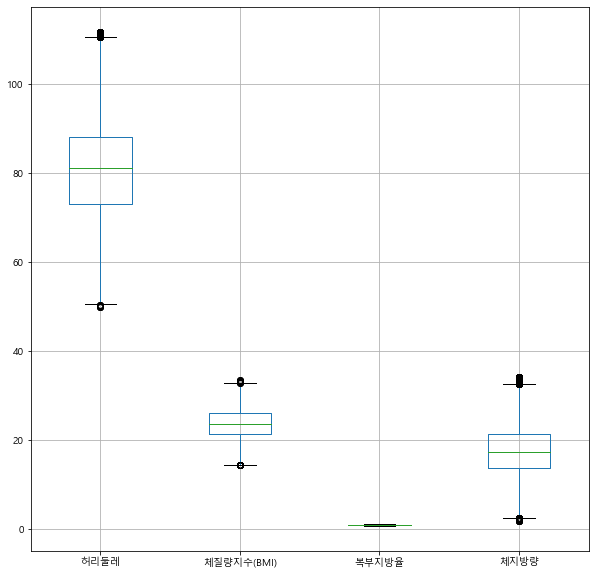

In [81]:
plt.rcParams["figure.figsize"] = (10, 10)
df_result.boxplot(column=target_cols)

In [82]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량
0,2010,7282,2520,1,42,NaN,NaN,NaN,NaN
1,2010,7490,3638,1,39,NaN,NaN,NaN,NaN
2,2010,7915,3997,1,36,NaN,NaN,NaN,NaN
3,2010,8056,4745,1,42,80.0,NaN,NaN,NaN
4,2010,8457,3929,1,38,NaN,NaN,NaN,NaN


In [83]:
target_cols

['허리둘레', '체질량지수(BMI)', '복부지방율', '체지방량']

In [84]:
len(target_cols)

4

In [85]:
target_cols_direction

['center', 'center', 'center', 'center']

In [86]:
def kde_col(df, cols):
    
    threshold = 100
    max_threshold = 150
    
    df_target = pd.DataFrame() # return DF
    
    # 연령대별로 sample_len개 샘플링
    tmp_data = df.groupby(['SEX', '검진당시나이']).apply(
        lambda x: x.sample(sample_len, replace=True, random_state=42))

    tmp_data.reset_index(drop=True, inplace=True)
    
    # 성연령별 모델 생성
    for sex, age in product([1, 2], range(df['검진당시나이'].min(), df['검진당시나이'].max() + 1)):    
        tmp_data2 = tmp_data[tmp_data['SEX'] == sex]
        tmp_data3 = tmp_data2[tmp_data2['검진당시나이'] == age]
        
        df_temp = df[df['SEX'] == sex]
        df_temp = df_temp[df_temp['검진당시나이'] == age]
        df_temp.reset_index(drop=True, inplace=True)
            
        df_age = pd.DataFrame()
        
        for index, col in enumerate(cols):
        
            input_data = tmp_data3[col].copy()
            
            # 결측치가 많을 때 평균을 넣게 되면 평균쪽으로 쏠림
#             try:
#                 input_data.fillna(input_data.mean().round(0), inplace=True)
#             except:                
#                 input_data.fillna(tmp_data2[col].mean().round(0), inplace=True)

            input_data.dropna(inplace = True)
                
            input_data = input_data.sort_values()
            
            if len(input_data.value_counts()) > 1:
                # kde 모델
                kde = gaussian_kde(input_data)
                result = kde(input_data)
                max_value = result.max()            

                df_col = df_temp[col].copy()
                df_col.fillna(df_col.mean().round(0), inplace=True)

                # 방향성이 있을 경우
                max_idx = result.argmax()  # 최대값의 인덱스
                std_value = input_data.iloc[max_idx] # 인덱스 최대값의 밸류값

                '''
                display print
                '''
#                 print('')
#                 print('@@ col :',col)
#                 plt.rcParams["figure.figsize"] = (5, 5)
#                 print('sex :',sex)
#                 print('age :',age)
#                 fig = plt.figure()
#                 ax = fig.add_subplot(111)
#                 x_eval = np.linspace(50, 140, num=200)
#                 ax.plot(input_data, result, 'k-')                
#                 plt.show()
#                 print('max_value: ',max_value)
#                 print('std_value: ',std_value)

                arr = []

                temp = pd.DataFrame(kde(df_col), columns=['kde'])

                if target_cols_direction[index]:
                    # center right
                    temp['trigger'] = (df_col >= std_value)
                elif target_cols_direction[index] == False:
                    # center left
                    temp['trigger'] = (df_col < std_value)

                if target_cols_direction[index] != 'center':
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * threshold if trigger else (1 + (1 - (temp['kde'].iloc[idx] / max_value))) * threshold
                                      for idx, trigger in temp['trigger'].iteritems()]
                else:                
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * (threshold * 1.5) for idx, value in temp['kde'].iteritems()]

    #             temp['gap'] = abs(temp['output'] - threshold)            
    #             a = 11
    #             temp['adjusted_gap'] = [np.log(temp['gap'].iloc[idx]) * a if gap> np.e else gap for idx, gap in temp['gap'].iteritems()]            
    #             temp[col + '_kde'] = [threshold - temp['adjusted_gap'].iloc[idx] if trigger else threshold + temp['adjusted_gap'].iloc[idx] for idx, trigger in temp['trigger'].iteritems()]

                temp[col + '_kde'] = temp['output']
                temp[col + '_kde'] = temp[col + '_kde'].round(2)
            else:
                temp[col + '_kde'] = threshold
            
            df_age = pd.concat([df_age, temp[col + '_kde']], axis=1)

        df_temp = pd.concat([df_temp, df_age], axis=1)
        df_target = pd.concat([df_target, df_temp])
        df_target.reset_index(drop=True, inplace=True)
    
    # Null 이면 100
    for col in target_cols:
        for idx in df_target[col][df_target[col].isnull()].index:        
            df_target.loc[idx, col + '_kde'] = threshold
            
#     df_target['kde_mean'] = df_target.iloc[:, (5+len(cols)):(5+len(cols)+len(cols))].mean('columns').round(2)
    
#     for col in target_cols:
#         df_target.drop([col + '_kde'], axis = 1, inplace = True)
    
    df_target.sort_values(by='CU_REC_ID', inplace=True)
    
    return df_target

In [87]:
import time
start = time.time()
df_target = kde_col(df_result, target_cols)
end = time.time()
print(f"{end - start:.5f} sec")

707.52643 sec


## 검진 항목 별 가중치 

In [88]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde
305813,2010,609272,143,1,40,83.0,23.3,0.88,17.3,148.41,133.59,129.10,149.11
614895,2010,585711,154,1,52,NaN,25.1,NaN,NaN,100.00,147.49,100.00,100.00
515927,2010,593983,156,1,48,NaN,23.8,NaN,NaN,100.00,141.81,100.00,100.00
279127,2010,612330,185,1,39,89.0,NaN,0.88,NaN,134.45,100.00,129.27,100.00
24775,2010,645901,212,1,28,82.4,NaN,0.84,NaN,141.82,100.00,150.00,100.00


In [89]:
target_cols_kde

['허리둘레_kde', '체질량지수(BMI)_kde', '복부지방율_kde', '체지방량_kde']

In [90]:
target_cols_ratio

[4, 4, 4, 4]

In [91]:
sum(target_cols_ratio)

16

In [92]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180149 entries, 305813 to 170716
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   검진년도            1180149 non-null  int64  
 1   UID             1180149 non-null  int64  
 2   CU_REC_ID       1180149 non-null  int64  
 3   SEX             1180149 non-null  int64  
 4   검진당시나이          1180149 non-null  int64  
 5   허리둘레            1116323 non-null  float64
 6   체질량지수(BMI)      1129853 non-null  float64
 7   복부지방율           255195 non-null   float64
 8   체지방량            244701 non-null   float64
 9   허리둘레_kde        1180149 non-null  float64
 10  체질량지수(BMI)_kde  1180149 non-null  float64
 11  복부지방율_kde       1180149 non-null  float64
 12  체지방량_kde        1180149 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 126.1 MB


In [93]:
df_target['kde_mean'] = (
      (target_cols_ratio[0] * df_target[target_cols_kde[0]])
    + (target_cols_ratio[1] * df_target[target_cols_kde[1]])
    + (target_cols_ratio[2] * df_target[target_cols_kde[2]])  
    + (target_cols_ratio[3] * df_target[target_cols_kde[3]])
) / sum(target_cols_ratio)

In [94]:
df_target['kde_mean'] = np.round(df_target['kde_mean'], 2)

In [95]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean
305813,2010,609272,143,1,40,83.0,23.3,0.88,17.3,148.41,133.59,129.10,149.11,140.05
614895,2010,585711,154,1,52,NaN,25.1,NaN,NaN,100.00,147.49,100.00,100.00,111.87
515927,2010,593983,156,1,48,NaN,23.8,NaN,NaN,100.00,141.81,100.00,100.00,110.45
279127,2010,612330,185,1,39,89.0,NaN,0.88,NaN,134.45,100.00,129.27,100.00,115.93
24775,2010,645901,212,1,28,82.4,NaN,0.84,NaN,141.82,100.00,150.00,100.00,122.96


In [96]:
df_target['kde_mean'].min()

0.97

In [97]:
df_target['kde_mean'].max()

149.96

In [98]:
df_target.sort_values(by=['검진당시나이', 'SEX']).head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean
19,2019,153543,325845,1,20,64.0,NaN,NaN,NaN,19.57,100.00,100.00,100.00,79.89
17,2019,152079,325977,1,20,101.0,32.0,0.98,NaN,16.43,18.15,24.82,100.00,39.85
42,2019,392728,325980,1,20,72.0,21.6,0.86,NaN,128.15,129.00,112.67,100.00,117.46
44,2019,438481,325982,1,20,81.0,22.7,0.87,NaN,120.08,138.56,107.93,100.00,116.64
45,2019,439691,326889,1,20,71.8,20.1,NaN,NaN,126.20,86.24,100.00,100.00,103.11
18,2019,153352,327360,1,20,NaN,24.2,NaN,NaN,100.00,144.33,100.00,100.00,111.08
13,2019,130234,328771,1,20,80.0,24.8,0.90,NaN,134.63,120.17,101.07,100.00,113.97
35,2019,339160,328877,1,20,85.0,24.5,0.84,NaN,62.19,134.25,134.36,100.00,107.70
8,2019,41096,329045,1,20,108.0,NaN,NaN,NaN,8.70,100.00,100.00,100.00,77.18
9,2019,117629,330495,1,20,65.0,20.3,NaN,NaN,27.66,90.59,100.00,100.00,79.56


In [99]:
df_target['검진당시나이'].value_counts()

40    52384
38    50566
36    48082
42    47609
39    44013
41    43818
37    43026
34    42511
32    41966
30    41283
44    40890
35    40175
43    38523
46    37558
48    37231
50    36868
31    34993
33    34826
45    33534
49    33190
47    32805
51    32583
28    32560
52    32116
29    30201
53    26366
54    23989
27    22289
26    18951
55    17175
56    15203
57    12618
58    11245
25    10184
59     8825
24     6760
60     6431
23     3223
22     2468
62     1817
61     1806
63     1272
21     1234
64     1221
20     1067
65      841
66      719
67      457
68      436
69      241
Name: 검진당시나이, dtype: int64

In [100]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean
count,1.180149e+06,1.180149e+06,1.180149e+06,1.180149e+06,1.180149e+06,1.116323e+06,1.129853e+06,255195.000000,244701.000000,1.180149e+06,1.180149e+06,1.180149e+06,1.180149e+06,1.180149e+06
mean,2.021880e+03,5.084693e+05,1.491641e+06,1.370096e+00,4.079445e+01,8.077814e+01,2.378492e+01,0.879695,17.871524,1.043266e+02,1.017947e+02,1.007996e+02,1.010548e+02,1.019939e+02
std,1.698868e+00,3.651772e+05,7.933728e+05,4.828305e-01,8.937040e+00,1.017257e+01,3.315016e+00,0.056793,5.553606,4.096964e+01,4.200730e+01,1.970158e+01,1.897096e+01,2.213559e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,4.980000e+01,1.430000e+01,0.720000,1.800000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.700000e-01
25%,2.021000e+03,2.211770e+05,6.803280e+05,1.000000e+00,3.400000e+01,7.300000e+01,2.140000e+01,0.840000,13.800000,7.731000e+01,7.181000e+01,1.000000e+02,1.000000e+02,8.908000e+01
50%,2.022000e+03,3.804710e+05,1.409955e+06,1.000000e+00,4.000000e+01,8.100000e+01,2.360000e+01,0.880000,17.200000,1.138100e+02,1.102700e+02,1.000000e+02,1.000000e+02,1.067600e+02
75%,2.023000e+03,8.358790e+05,2.173982e+06,2.000000e+00,4.800000e+01,8.800000e+01,2.600000e+01,0.920000,21.300000,1.409700e+02,1.399700e+02,1.000000e+02,1.000000e+02,1.186800e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,1.117000e+02,3.337000e+01,1.040000,34.100000,1.500400e+02,1.500600e+02,1.500000e+02,1.500900e+02,1.499600e+02


<AxesSubplot:>

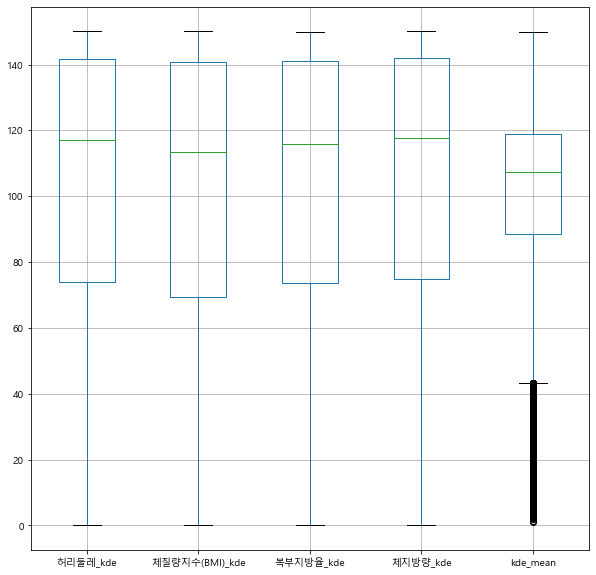

In [101]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['허리둘레_kde', '체질량지수(BMI)_kde', '복부지방율_kde', '체지방량_kde', 'kde_mean'])

<AxesSubplot:>

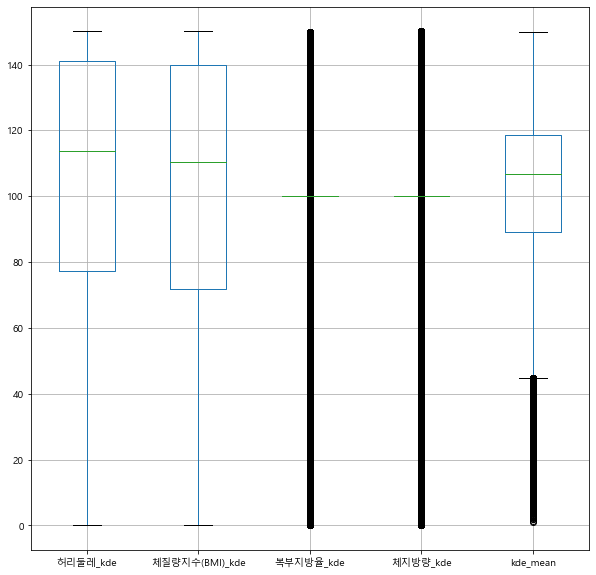

In [102]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['허리둘레_kde', '체질량지수(BMI)_kde', '복부지방율_kde', '체지방량_kde', 'kde_mean'])

In [103]:
# df_target[df_target['SEX'] == 1]['복부지방율_kde'].value_counts().head(300)

In [104]:
# df_target[df_target['SEX'] == 1]['체지방량_kde'].value_counts().head(500)

## target Scaling

In [105]:
df_target['kde_mean'].max()

149.96

In [106]:
df_target['kde_mean'].min()

0.97

In [107]:
# df_target['target'] = ((df_target['kde_mean'] - df_target['kde_mean'].min()) / (df_target['kde_mean'].max() - df_target['kde_mean'].min()))
df_target['target'] = ((df_target['kde_mean'] - 0) / (200 - 0))

In [108]:
df_target['target'] = (df_target['target'] * 100) + 50

In [109]:
df_target['target'] = df_target['target'].round(0)

In [110]:
df_target['target'].value_counts().reset_index().sort_values('index')

,index,target
75,50.0,1
74,51.0,8
73,52.0,31
72,53.0,83
71,54.0,87
69,55.0,145
67,56.0,222
66,57.0,227
68,58.0,211
65,59.0,240


In [111]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target
count,1.180149e+06,1.180149e+06,1.180149e+06,1.180149e+06,1.180149e+06,1.116323e+06,1.129853e+06,255195.000000,244701.000000,1.180149e+06,1.180149e+06,1.180149e+06,1.180149e+06,1.180149e+06,1.180149e+06
mean,2.021880e+03,5.084693e+05,1.491641e+06,1.370096e+00,4.079445e+01,8.077814e+01,2.378492e+01,0.879695,17.871524,1.043266e+02,1.017947e+02,1.007996e+02,1.010548e+02,1.019939e+02,1.009925e+02
std,1.698868e+00,3.651772e+05,7.933728e+05,4.828305e-01,8.937040e+00,1.017257e+01,3.315016e+00,0.056793,5.553606,4.096964e+01,4.200730e+01,1.970158e+01,1.897096e+01,2.213559e+01,1.106686e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,4.980000e+01,1.430000e+01,0.720000,1.800000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.700000e-01,5.000000e+01
25%,2.021000e+03,2.211770e+05,6.803280e+05,1.000000e+00,3.400000e+01,7.300000e+01,2.140000e+01,0.840000,13.800000,7.731000e+01,7.181000e+01,1.000000e+02,1.000000e+02,8.908000e+01,9.500000e+01
50%,2.022000e+03,3.804710e+05,1.409955e+06,1.000000e+00,4.000000e+01,8.100000e+01,2.360000e+01,0.880000,17.200000,1.138100e+02,1.102700e+02,1.000000e+02,1.000000e+02,1.067600e+02,1.030000e+02
75%,2.023000e+03,8.358790e+05,2.173982e+06,2.000000e+00,4.800000e+01,8.800000e+01,2.600000e+01,0.920000,21.300000,1.409700e+02,1.399700e+02,1.000000e+02,1.000000e+02,1.186800e+02,1.090000e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,1.117000e+02,3.337000e+01,1.040000,34.100000,1.500400e+02,1.500600e+02,1.500000e+02,1.500900e+02,1.499600e+02,1.250000e+02


<AxesSubplot:>

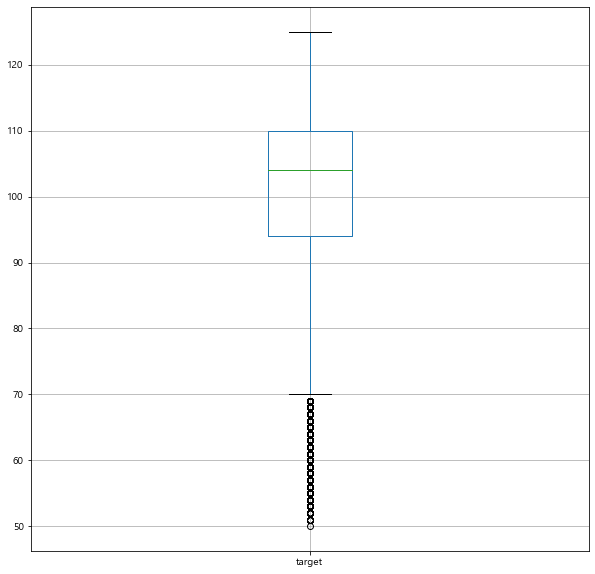

In [112]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

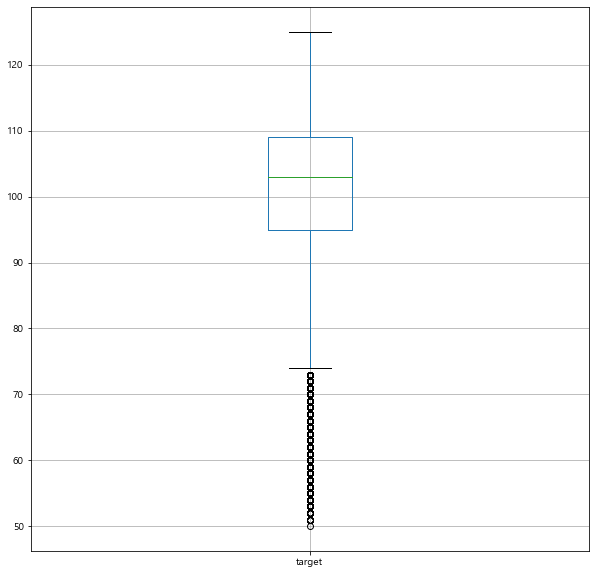

In [113]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

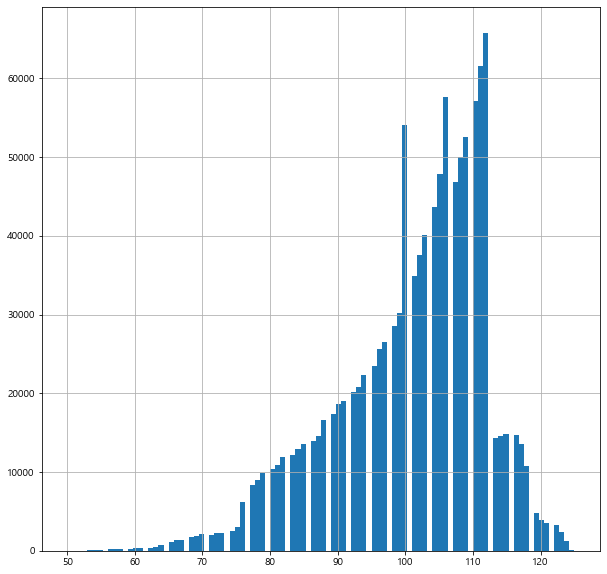

In [114]:
df_boxplot['target'].hist(bins=100)

In [115]:
df_target.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target
305813,2010,609272,143,1,40,83.0,23.3,0.88,17.3,148.41,133.59,129.10,149.11,140.05,120.0
614895,2010,585711,154,1,52,NaN,25.1,NaN,NaN,100.00,147.49,100.00,100.00,111.87,106.0
515927,2010,593983,156,1,48,NaN,23.8,NaN,NaN,100.00,141.81,100.00,100.00,110.45,105.0
279127,2010,612330,185,1,39,89.0,NaN,0.88,NaN,134.45,100.00,129.27,100.00,115.93,108.0
24775,2010,645901,212,1,28,82.4,NaN,0.84,NaN,141.82,100.00,150.00,100.00,122.96,111.0
784807,2010,710490,213,2,28,76.4,NaN,0.83,NaN,65.65,100.00,149.95,100.00,103.90,102.0
446979,2010,491012,226,1,45,90.0,NaN,0.93,NaN,116.19,100.00,143.80,100.00,115.00,108.0
746739,2010,315847,230,2,23,79.5,NaN,0.79,NaN,40.27,100.00,78.09,100.00,79.59,90.0
749067,2010,719072,231,2,24,71.2,NaN,0.78,NaN,101.13,100.00,85.62,100.00,96.69,98.0
248879,2010,614169,238,1,38,88.5,NaN,0.92,NaN,137.14,100.00,124.58,100.00,115.43,108.0


## target 계산 결과

<AxesSubplot:xlabel='검진당시나이'>

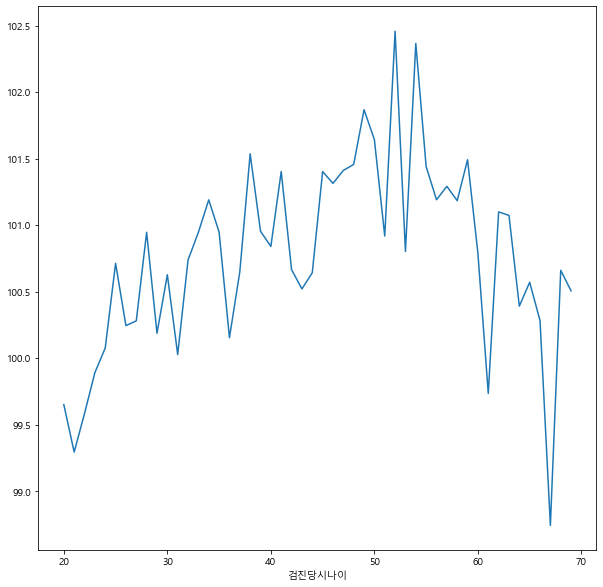

In [116]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').mean()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

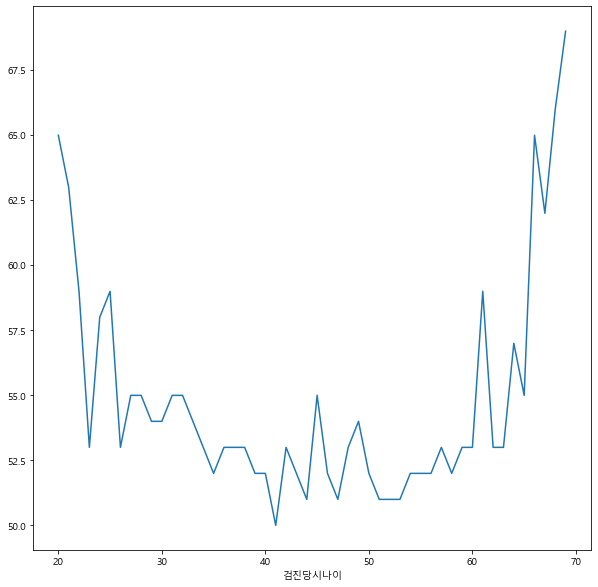

In [117]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').min()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

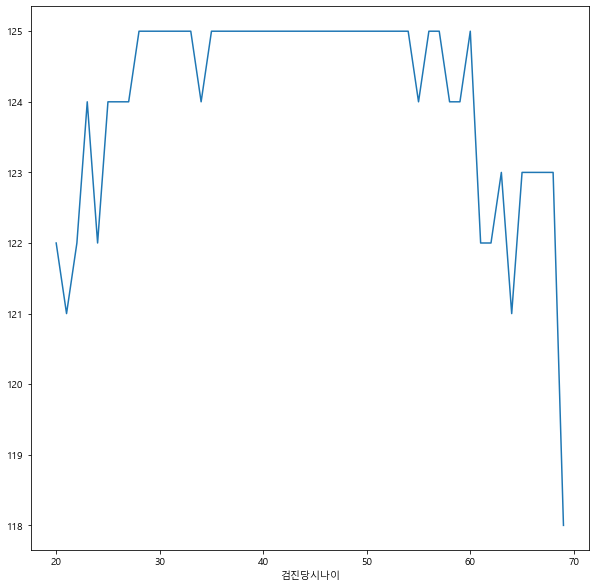

In [118]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').max()['target'].plot()

In [119]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target
305813,2010,609272,143,1,40,83.0,23.3,0.88,17.3,148.41,133.59,129.10,149.11,140.05,120.0
614895,2010,585711,154,1,52,NaN,25.1,NaN,NaN,100.00,147.49,100.00,100.00,111.87,106.0
515927,2010,593983,156,1,48,NaN,23.8,NaN,NaN,100.00,141.81,100.00,100.00,110.45,105.0
279127,2010,612330,185,1,39,89.0,NaN,0.88,NaN,134.45,100.00,129.27,100.00,115.93,108.0
24775,2010,645901,212,1,28,82.4,NaN,0.84,NaN,141.82,100.00,150.00,100.00,122.96,111.0


# 결측행 제거

In [120]:
# df_result.dropna(axis=0).info()

In [121]:
# df_result.dropna(axis=0, inplace=True)

# 남성 모델

In [122]:
df_target['SEX'].value_counts()

1    743380
2    436769
Name: SEX, dtype: int64

In [123]:
df_man = df_target[df_target['SEX'] == 1]
len(df_man)

743380

In [124]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target
305813,2010,609272,143,1,40,83.0,23.3,0.88,17.3,148.41,133.59,129.10,149.11,140.05,120.0
614895,2010,585711,154,1,52,NaN,25.1,NaN,NaN,100.00,147.49,100.00,100.00,111.87,106.0
515927,2010,593983,156,1,48,NaN,23.8,NaN,NaN,100.00,141.81,100.00,100.00,110.45,105.0
279127,2010,612330,185,1,39,89.0,NaN,0.88,NaN,134.45,100.00,129.27,100.00,115.93,108.0
24775,2010,645901,212,1,28,82.4,NaN,0.84,NaN,141.82,100.00,150.00,100.00,122.96,111.0


# 결측치 처리

## 결측치 삭제

In [125]:
# df_man.dropna(inplace=True)

In [126]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target
305813,2010,609272,143,1,40,83.0,23.3,0.88,17.3,148.41,133.59,129.10,149.11,140.05,120.0
614895,2010,585711,154,1,52,NaN,25.1,NaN,NaN,100.00,147.49,100.00,100.00,111.87,106.0
515927,2010,593983,156,1,48,NaN,23.8,NaN,NaN,100.00,141.81,100.00,100.00,110.45,105.0
279127,2010,612330,185,1,39,89.0,NaN,0.88,NaN,134.45,100.00,129.27,100.00,115.93,108.0
24775,2010,645901,212,1,28,82.4,NaN,0.84,NaN,141.82,100.00,150.00,100.00,122.96,111.0


## 결측치 평균으로 대체

In [127]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [128]:
# 나이로 group by, 결측치를 평균으로 대체
# df_man = df_man.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [129]:
target_cols

['허리둘레', '체질량지수(BMI)', '복부지방율', '체지방량']

In [130]:
len(df_man)

743380

In [131]:
df_man.dropna(subset=target_cols, how='all', inplace=True)

In [132]:
len(df_man)

730505

In [133]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target
305813,2010,609272,143,1,40,83.0,23.3,0.88,17.3,148.41,133.59,129.10,149.11,140.05,120.0
614895,2010,585711,154,1,52,NaN,25.1,NaN,NaN,100.00,147.49,100.00,100.00,111.87,106.0
515927,2010,593983,156,1,48,NaN,23.8,NaN,NaN,100.00,141.81,100.00,100.00,110.45,105.0
279127,2010,612330,185,1,39,89.0,NaN,0.88,NaN,134.45,100.00,129.27,100.00,115.93,108.0
24775,2010,645901,212,1,28,82.4,NaN,0.84,NaN,141.82,100.00,150.00,100.00,122.96,111.0


## fillna

In [134]:
df_man.mean().round(2)

검진년도                 2021.93
UID                516941.94
CU_REC_ID         1508552.48
SEX                     1.00
검진당시나이                 42.09
허리둘레                   85.72
체질량지수(BMI)             24.97
복부지방율                   0.90
체지방량                   18.15
허리둘레_kde              104.58
체질량지수(BMI)_kde        102.50
복부지방율_kde             100.87
체지방량_kde              101.07
kde_mean              102.26
target                101.12
dtype: float64

In [135]:
df_man.fillna(df_man.mean().round(2), inplace=True)

In [136]:
# df_man.fillna(0, inplace=True)

## IterativeImputer

In [137]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_target))
# df_impute.columns = df.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [138]:
# import time
# start = time.time()
# np_imputed = mice(df_man.values) # mice 학습시작
# df_man = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

# 스크리닝

## 스크리닝

In [139]:
# screening = 80

In [140]:
# scr_col = 'ALP'

In [141]:
# df_man[df_man[scr_col] < screening].head()

In [142]:
# len(df_man[df_man[scr_col] < screening])

In [143]:
# df_man.loc[df_man[scr_col] < screening, scr_col] = screening

In [144]:
# df_man[df_man[scr_col] < screening].head()

In [145]:
# len(df_man[df_man[scr_col] < screening])

# 중복 제거

In [146]:
len(df_man)

730505

In [147]:
len(df_man)

730505

In [148]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_man.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [149]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target
2310,2011,32,11757,1,24,72.0,17.6,0.90,18.15,101.34,14.27,100.00,100.00,78.90,89.0
639193,2019,50,356493,1,53,82.0,25.6,0.90,18.15,122.33,125.81,100.00,100.00,112.04,106.0
680842,2021,50,642497,1,55,85.0,25.8,0.90,18.15,148.46,121.32,100.00,100.00,117.44,109.0
306406,2019,62,421626,1,40,89.0,25.1,0.90,18.15,133.28,148.66,100.00,100.00,120.48,110.0
340488,2020,62,565527,1,41,80.0,24.4,0.90,18.15,112.41,147.92,100.00,100.00,115.08,108.0
371648,2021,62,699357,1,42,85.0,25.4,0.90,18.15,149.73,129.70,100.00,100.00,119.86,110.0
403282,2022,62,1356310,1,43,73.0,24.2,0.90,18.15,28.50,145.71,100.00,100.00,93.55,97.0
435100,2023,62,2170394,1,44,74.0,24.6,0.90,18.15,38.47,149.80,100.00,100.00,97.07,99.0
591084,2019,67,410099,1,51,90.0,29.5,0.90,18.15,121.70,34.63,100.00,100.00,89.08,95.0
617161,2020,67,481109,1,52,92.0,29.1,0.90,18.15,112.21,39.83,100.00,100.00,88.01,94.0


In [150]:
len(df_man)

730505

In [151]:
df_man[target_cols]

,허리둘레,체질량지수(BMI),복부지방율,체지방량
2310,72.0,17.6,0.90,18.15
639193,82.0,25.6,0.90,18.15
680842,85.0,25.8,0.90,18.15
306406,89.0,25.1,0.90,18.15
340488,80.0,24.4,0.90,18.15
...,...,...,...,...
52036,76.0,21.9,0.88,18.15
297423,96.0,27.7,0.90,18.15
11918,94.0,28.9,1.01,18.15
651988,81.0,25.1,0.87,18.15


## first만 남겨두고 중복 제거

In [152]:
df_man = df_man.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [153]:
len(df_man)

616424

In [154]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target
2310,2011,32,11757,1,24,72.00,17.6,0.90,18.15,101.34,14.27,100.00,100.00,78.90,89.0
639193,2019,50,356493,1,53,82.00,25.6,0.90,18.15,122.33,125.81,100.00,100.00,112.04,106.0
680842,2021,50,642497,1,55,85.00,25.8,0.90,18.15,148.46,121.32,100.00,100.00,117.44,109.0
306406,2019,62,421626,1,40,89.00,25.1,0.90,18.15,133.28,148.66,100.00,100.00,120.48,110.0
340488,2020,62,565527,1,41,80.00,24.4,0.90,18.15,112.41,147.92,100.00,100.00,115.08,108.0
371648,2021,62,699357,1,42,85.00,25.4,0.90,18.15,149.73,129.70,100.00,100.00,119.86,110.0
403282,2022,62,1356310,1,43,73.00,24.2,0.90,18.15,28.50,145.71,100.00,100.00,93.55,97.0
435100,2023,62,2170394,1,44,74.00,24.6,0.90,18.15,38.47,149.80,100.00,100.00,97.07,99.0
591084,2019,67,410099,1,51,90.00,29.5,0.90,18.15,121.70,34.63,100.00,100.00,89.08,95.0
617161,2020,67,481109,1,52,92.00,29.1,0.90,18.15,112.21,39.83,100.00,100.00,88.01,94.0


In [155]:
df_man.reset_index(drop=True, inplace=True)

In [156]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target
0,2011,32,11757,1,24,72.0,17.6,0.9,18.15,101.34,14.27,100.0,100.0,78.90,89.0
1,2019,50,356493,1,53,82.0,25.6,0.9,18.15,122.33,125.81,100.0,100.0,112.04,106.0
2,2021,50,642497,1,55,85.0,25.8,0.9,18.15,148.46,121.32,100.0,100.0,117.44,109.0
3,2019,62,421626,1,40,89.0,25.1,0.9,18.15,133.28,148.66,100.0,100.0,120.48,110.0
4,2020,62,565527,1,41,80.0,24.4,0.9,18.15,112.41,147.92,100.0,100.0,115.08,108.0


In [157]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616424 entries, 0 to 616423
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   검진년도            616424 non-null  int64  
 1   UID             616424 non-null  int64  
 2   CU_REC_ID       616424 non-null  int64  
 3   SEX             616424 non-null  int64  
 4   검진당시나이          616424 non-null  int64  
 5   허리둘레            616424 non-null  float64
 6   체질량지수(BMI)      616424 non-null  float64
 7   복부지방율           616424 non-null  float64
 8   체지방량            616424 non-null  float64
 9   허리둘레_kde        616424 non-null  float64
 10  체질량지수(BMI)_kde  616424 non-null  float64
 11  복부지방율_kde       616424 non-null  float64
 12  체지방량_kde        616424 non-null  float64
 13  kde_mean        616424 non-null  float64
 14  target          616424 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 70.5 MB


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

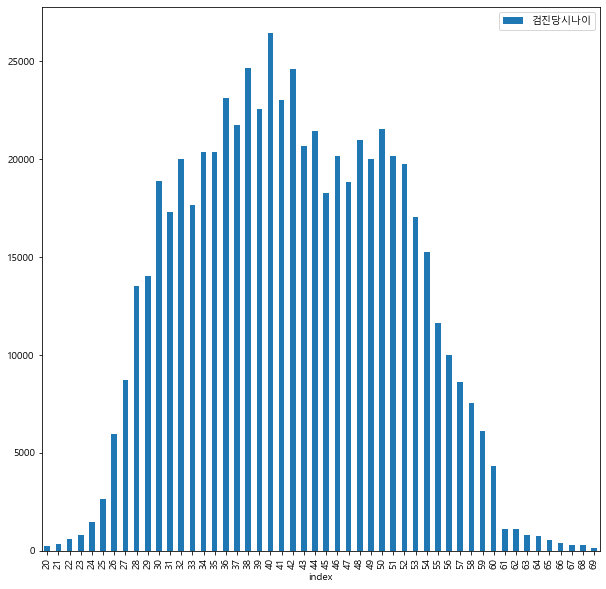

In [158]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [159]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
48,20,229
45,21,318
42,22,574
40,23,774
36,24,1444
35,25,2639
33,26,5979
29,27,8725
26,28,13492
25,29,14029


# 검진항목 시각화

In [160]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target
count,616424.000000,6.164240e+05,6.164240e+05,616424.0,616424.000000,616424.000000,616424.000000,616424.000000,616424.000000,616424.000000,616424.000000,616424.000000,616424.000000,616424.000000,616424.000000
mean,2021.881294,5.129508e+05,1.506135e+06,1.0,42.065324,85.704542,24.970457,0.899494,18.158975,104.503471,102.394623,100.811419,100.910561,102.155020,101.072411
std,1.735519,3.657971e+05,8.064612e+05,0.0,8.883768,7.634354,2.845050,0.023508,2.483694,40.816426,41.602067,18.964982,18.208329,21.931119,10.965368
min,2010.000000,3.200000e+01,1.430000e+02,1.0,20.000000,50.000000,14.300000,0.720000,1.900000,0.000000,0.000000,0.000000,0.070000,0.970000,50.000000
25%,2021.000000,2.233048e+05,6.685058e+05,1.0,35.000000,80.900000,23.000000,0.900000,18.150000,76.990000,72.260000,100.000000,100.000000,88.800000,94.000000
50%,2022.000000,3.829575e+05,1.457637e+06,1.0,42.000000,85.720000,24.900000,0.900000,18.150000,114.520000,111.860000,100.000000,100.000000,107.340000,104.000000
75%,2023.000000,8.417495e+05,2.205706e+06,1.0,49.000000,90.300000,26.700000,0.900000,18.150000,141.090000,140.140000,100.000000,100.000000,118.790000,109.000000
max,2024.000000,1.473645e+06,2.871445e+06,1.0,69.000000,111.700000,33.370000,1.040000,34.100000,150.040000,150.050000,150.000000,150.090000,149.960000,125.000000


<AxesSubplot:xlabel='검진당시나이'>

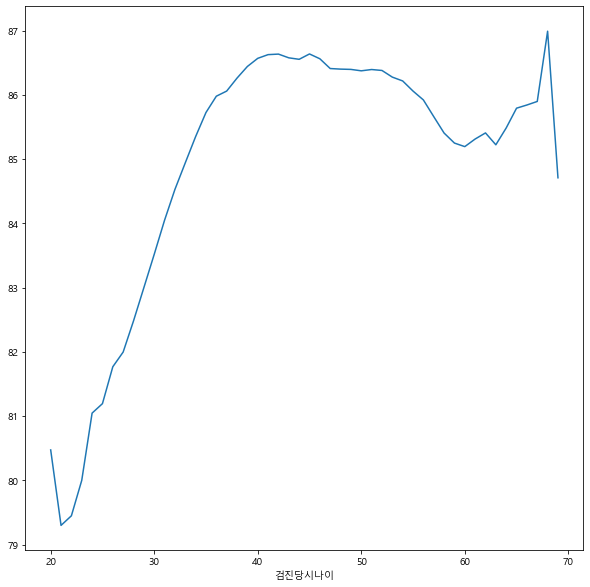

In [161]:
df_man.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

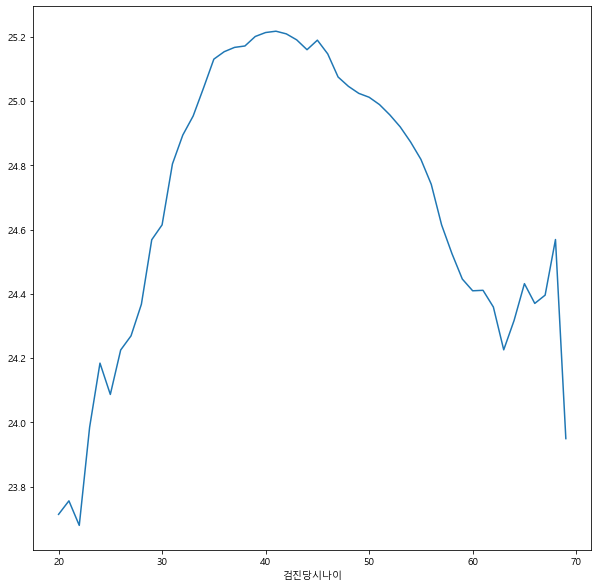

In [162]:
df_man.groupby('검진당시나이').mean()[target_cols[1]].plot()

In [163]:
# df_man.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

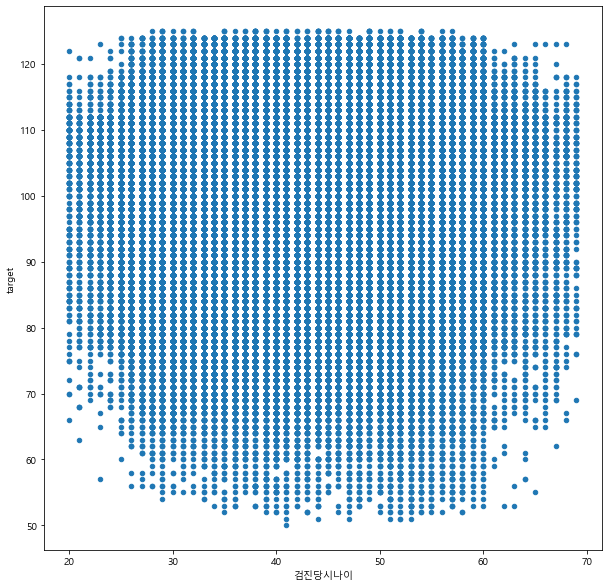

In [164]:
df_man.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

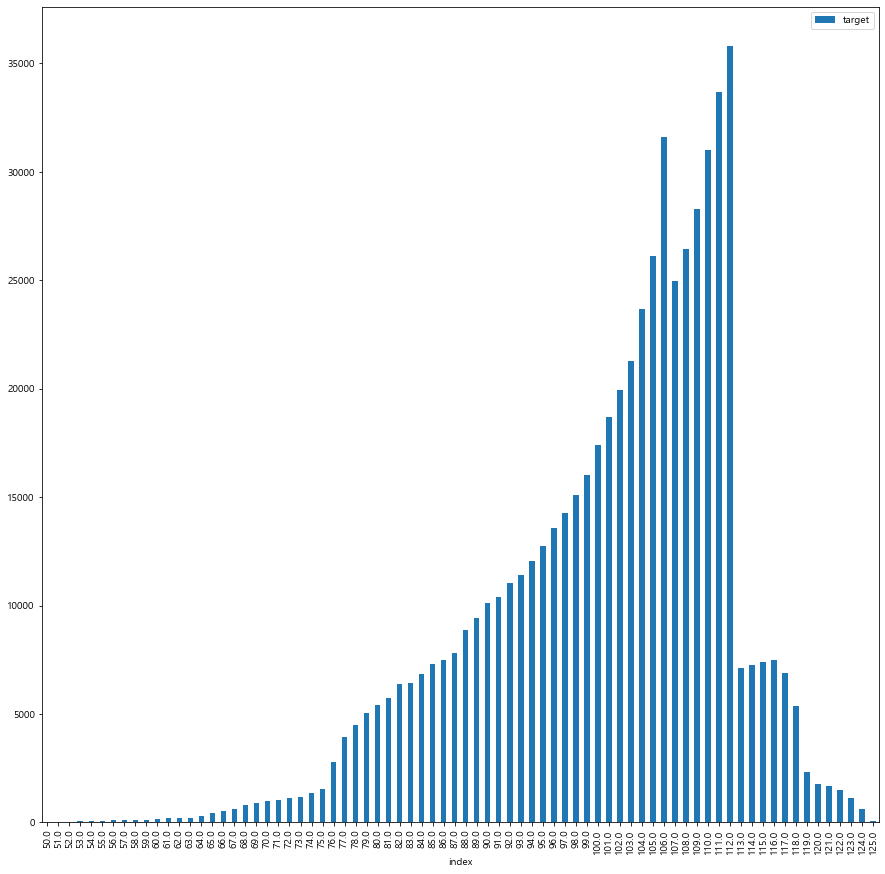

In [165]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [166]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
75,50.0,1
74,51.0,7
73,52.0,22
72,53.0,49
71,54.0,57
69,55.0,82
68,56.0,98
66,57.0,105
67,58.0,104
65,59.0,124


In [167]:
df_man_sampling = pd.DataFrame()

# for target in range(int(df_man['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_man[df_man['target'] == target])
    right_len = len(df_man[df_man['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == 100]])                    

In [168]:
# df_man = df_man_sampling.copy()

<AxesSubplot:xlabel='index'>

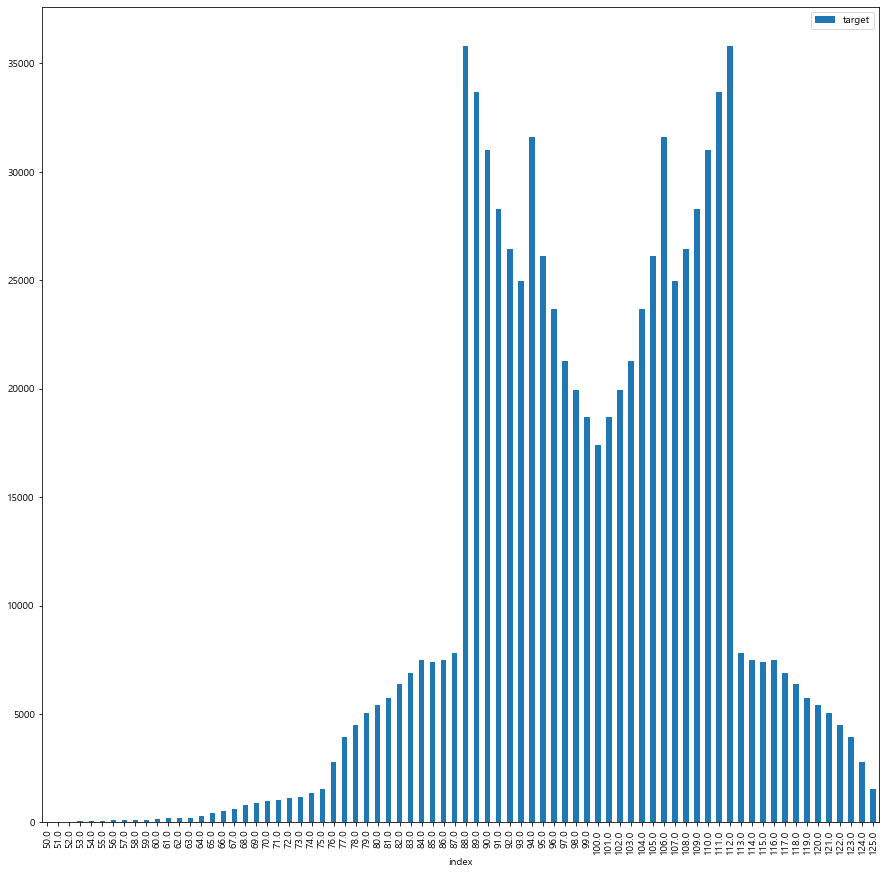

In [169]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [170]:
df_man_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
75,50.0,1
74,51.0,7
73,52.0,22
72,53.0,49
71,54.0,57
70,55.0,82
69,56.0,98
67,57.0,105
68,58.0,104
66,59.0,124


# 나이별 확인하기

In [171]:
# target = 'target'

In [172]:
# df_man_sample = None
                 
# for idx in range(int(df_man[target].min()), int(df_man[target].max() + 1)):    
#     if len(df_man[df_man[target] == idx]) > 0:
#         temp_ = df_man[df_man[target] == idx].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#         df_man_sample = pd.concat([df_man_sample, temp_])

# df_man_sample.sample(frac=1).reset_index(drop=True, inplace=True)

In [173]:
# df_man = df_man_sample

In [174]:
# int(df_man['검진당시나이'].value_counts().mean())

In [175]:
# df_man['검진당시나이'].min()

In [176]:
# df_man['검진당시나이'].max()

In [177]:
# df_man.columns

In [178]:
# df_temp = None
# # sample_len = int(df_man['검진당시나이'].value_counts().mean())
# # sample_len = 1000
                 
# for age in range(df_man['검진당시나이'].min(), df_man['검진당시나이'].max()):
#     temp_ = df_man[df_man['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [179]:
# df_temp.info()

In [180]:
# df_temp.reset_index(drop=True, inplace=True)

In [181]:
# df_man = df_temp.copy()

In [182]:
# df_man['검진당시나이'].value_counts()

In [183]:
# df_man[df_man['검진당시나이']==38]

In [184]:
# df_man[df_man['검진당시나이']==38]['UID'].value_counts()

# model train

In [185]:
df_man.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '허리둘레', '체질량지수(BMI)',
       '복부지방율', '체지방량', '허리둘레_kde', '체질량지수(BMI)_kde', '복부지방율_kde', '체지방량_kde',
       'kde_mean', 'target'],
      dtype='object')

In [186]:
# train_columns = [
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)',
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                  ]

In [187]:
target_cols

['허리둘레', '체질량지수(BMI)', '복부지방율', '체지방량']

In [188]:
train_columns = target_cols.copy()

In [189]:
train_columns.insert(0, '검진당시나이')

In [190]:
target_cols

['허리둘레', '체질량지수(BMI)', '복부지방율', '체지방량']

In [191]:
train_columns

['검진당시나이', '허리둘레', '체질량지수(BMI)', '복부지방율', '체지방량']

In [192]:
target_col = 'target'

## Min Max Scaling

In [193]:
from sklearn.preprocessing import MinMaxScaler

In [194]:
scaling_bool

False

In [195]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_man_sampling[train_columns])
    df_man_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

## train_test_split

In [196]:
if scaling_bool:
    X_train, X_test, y_train, y_test = train_test_split(df_man_scaled[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)
else :
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [197]:
# model = LinearRegression()

In [198]:
# model.fit(X_train, y_train)

In [199]:
# model.intercept_

In [200]:
# model.coef_

## Randomized SearchCV, 파라미터 튜닝

In [201]:
model = XGBRegressor()

In [202]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [203]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [204]:
import time
start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search)) # best parameter

RandomizedSearchCV took 2447.04 seconds for 10 candidates parameter settings.


In [205]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.4,
 'booster': 'gbtree'}

In [206]:
# best score
random_search.best_score_

-0.7464760672169247

In [207]:
model = random_search.best_estimator_
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.4,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.400000006,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [208]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [209]:
# model = build_model()

In [210]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [211]:
# model.summary()

In [212]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [213]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [214]:
# plot_history(history)

## pyTorch 신경망

In [215]:
np.shape(X_train)[1]

5

In [216]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [217]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [218]:
# epochs = 1000

In [219]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [220]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [221]:
# plt.plot(losses)

## coef 계산

In [222]:
# df_coef = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model.coef_).reset_index(drop=True)], axis=1)

In [223]:
# df_coef.columns = ['검사항목', 'coef']

In [224]:
# df_coef['coef'] = df_coef['coef'].round(4)

In [225]:
# df_coef['abs_coef'] = df_coef['coef'].abs()

In [226]:
# df_coef.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [227]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)

In [228]:
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

In [229]:
# slr = LinearRegression()

In [230]:
# slr.fit(X_train_poly, y_train)

In [231]:
# np.shape(X_train)

In [232]:
# np.shape(X_train_poly)

In [233]:
# np.shape(X_test)

In [234]:
# np.shape(X_test_poly)

In [235]:
# y_pred_poly = slr.predict(X_test_poly)

In [236]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test, y_pred_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test, y_pred_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_poly)))

In [237]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred_poly)

# model save

In [238]:
import pickle
with open(model_path_man,'wb') as f:
    pickle.dump(model, f)

In [239]:
import pickle
with open(model_path_man, 'rb') as f:
    model = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [240]:
pyTorch_bool

False

In [241]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model.eval()
        y_pred = model(X_test)
        y_pred = y_pred.numpy()

## XGBRegressor

In [242]:
XGB_bool

True

In [243]:
if XGB_bool:
    y_pred = model.predict(X_test)

In [244]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test, y_pred))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test, y_pred))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 0.49149576514275123
MSE : 0.7607427425132186
RMSE : 0.8722056767260912


In [245]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9936638593425627

In [246]:
model.score(X_test, y_test)

0.9936638593425627

## feature importance

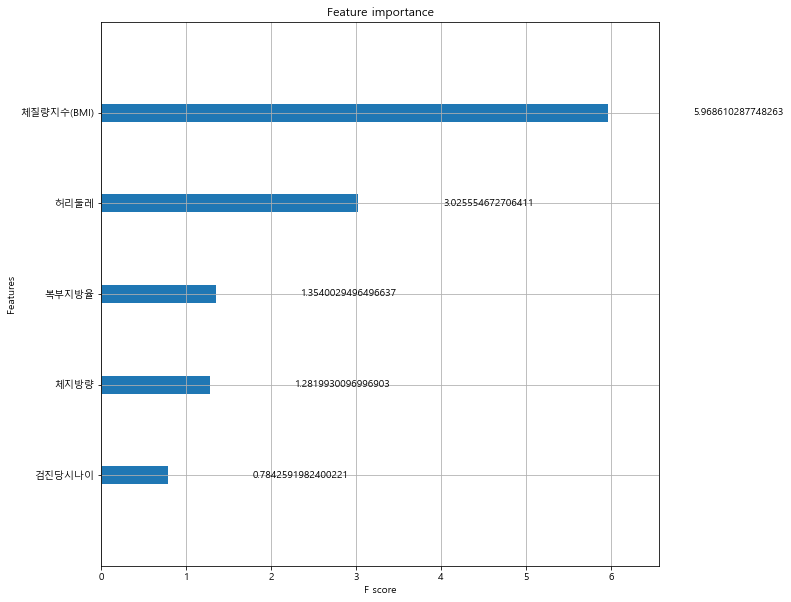

In [247]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model, importance_type='gain')

In [248]:
model.feature_importances_

array([0.06317324, 0.24371293, 0.48078042, 0.10906695, 0.10326645],
      dtype=float32)

In [249]:
df_feature = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model.feature_importances_)], axis=1)
df_feature.columns = ['columns', 'feature_importance']

In [250]:
df_feature.sort_values('feature_importance', ascending=False)

,columns,feature_importance
2,체질량지수(BMI),0.480780
1,허리둘레,0.243713
3,복부지방율,0.109067
4,체지방량,0.103266
0,검진당시나이,0.063173


# 실제지수 - 예측지수 결과

In [251]:
pd.DataFrame(y_test).reset_index(drop=True)

,target
0,108.0
1,107.0
2,113.0
3,89.0
4,90.0
...,...
203929,98.0
203930,87.0
203931,90.0
203932,93.0


In [252]:
pd.DataFrame(y_pred).reset_index(drop=True)

,0
0,108.030548
1,107.289513
2,114.121117
3,88.627121
4,89.696808
...,...
203929,98.491913
203930,87.031448
203931,90.272934
203932,92.746994


In [253]:
df_test = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

In [254]:
df_test.head()

,target,0
0,108.0,108.030548
1,107.0,107.289513
2,113.0,114.121117
3,89.0,88.627121
4,90.0,89.696808


In [255]:
df_test.columns

Index(['target', 0], dtype='object')

In [256]:
df_test.columns = ['실제지수', '예측지수']

In [257]:
df_test['diff'] = df_test['예측지수'] - df_test['실제지수']

In [258]:
df_test.head()

,실제지수,예측지수,diff
0,108.0,108.030548,0.030548
1,107.0,107.289513,0.289513
2,113.0,114.121117,1.121117
3,89.0,88.627121,-0.372879
4,90.0,89.696808,-0.303192


In [259]:
df_test['diff_int'] = df_test['diff'].round(0)

In [260]:
len(df_test)

203934

In [261]:
df_test.head()

,실제지수,예측지수,diff,diff_int
0,108.0,108.030548,0.030548,0.0
1,107.0,107.289513,0.289513,0.0
2,113.0,114.121117,1.121117,1.0
3,89.0,88.627121,-0.372879,-0.0
4,90.0,89.696808,-0.303192,-0.0


<AxesSubplot:>

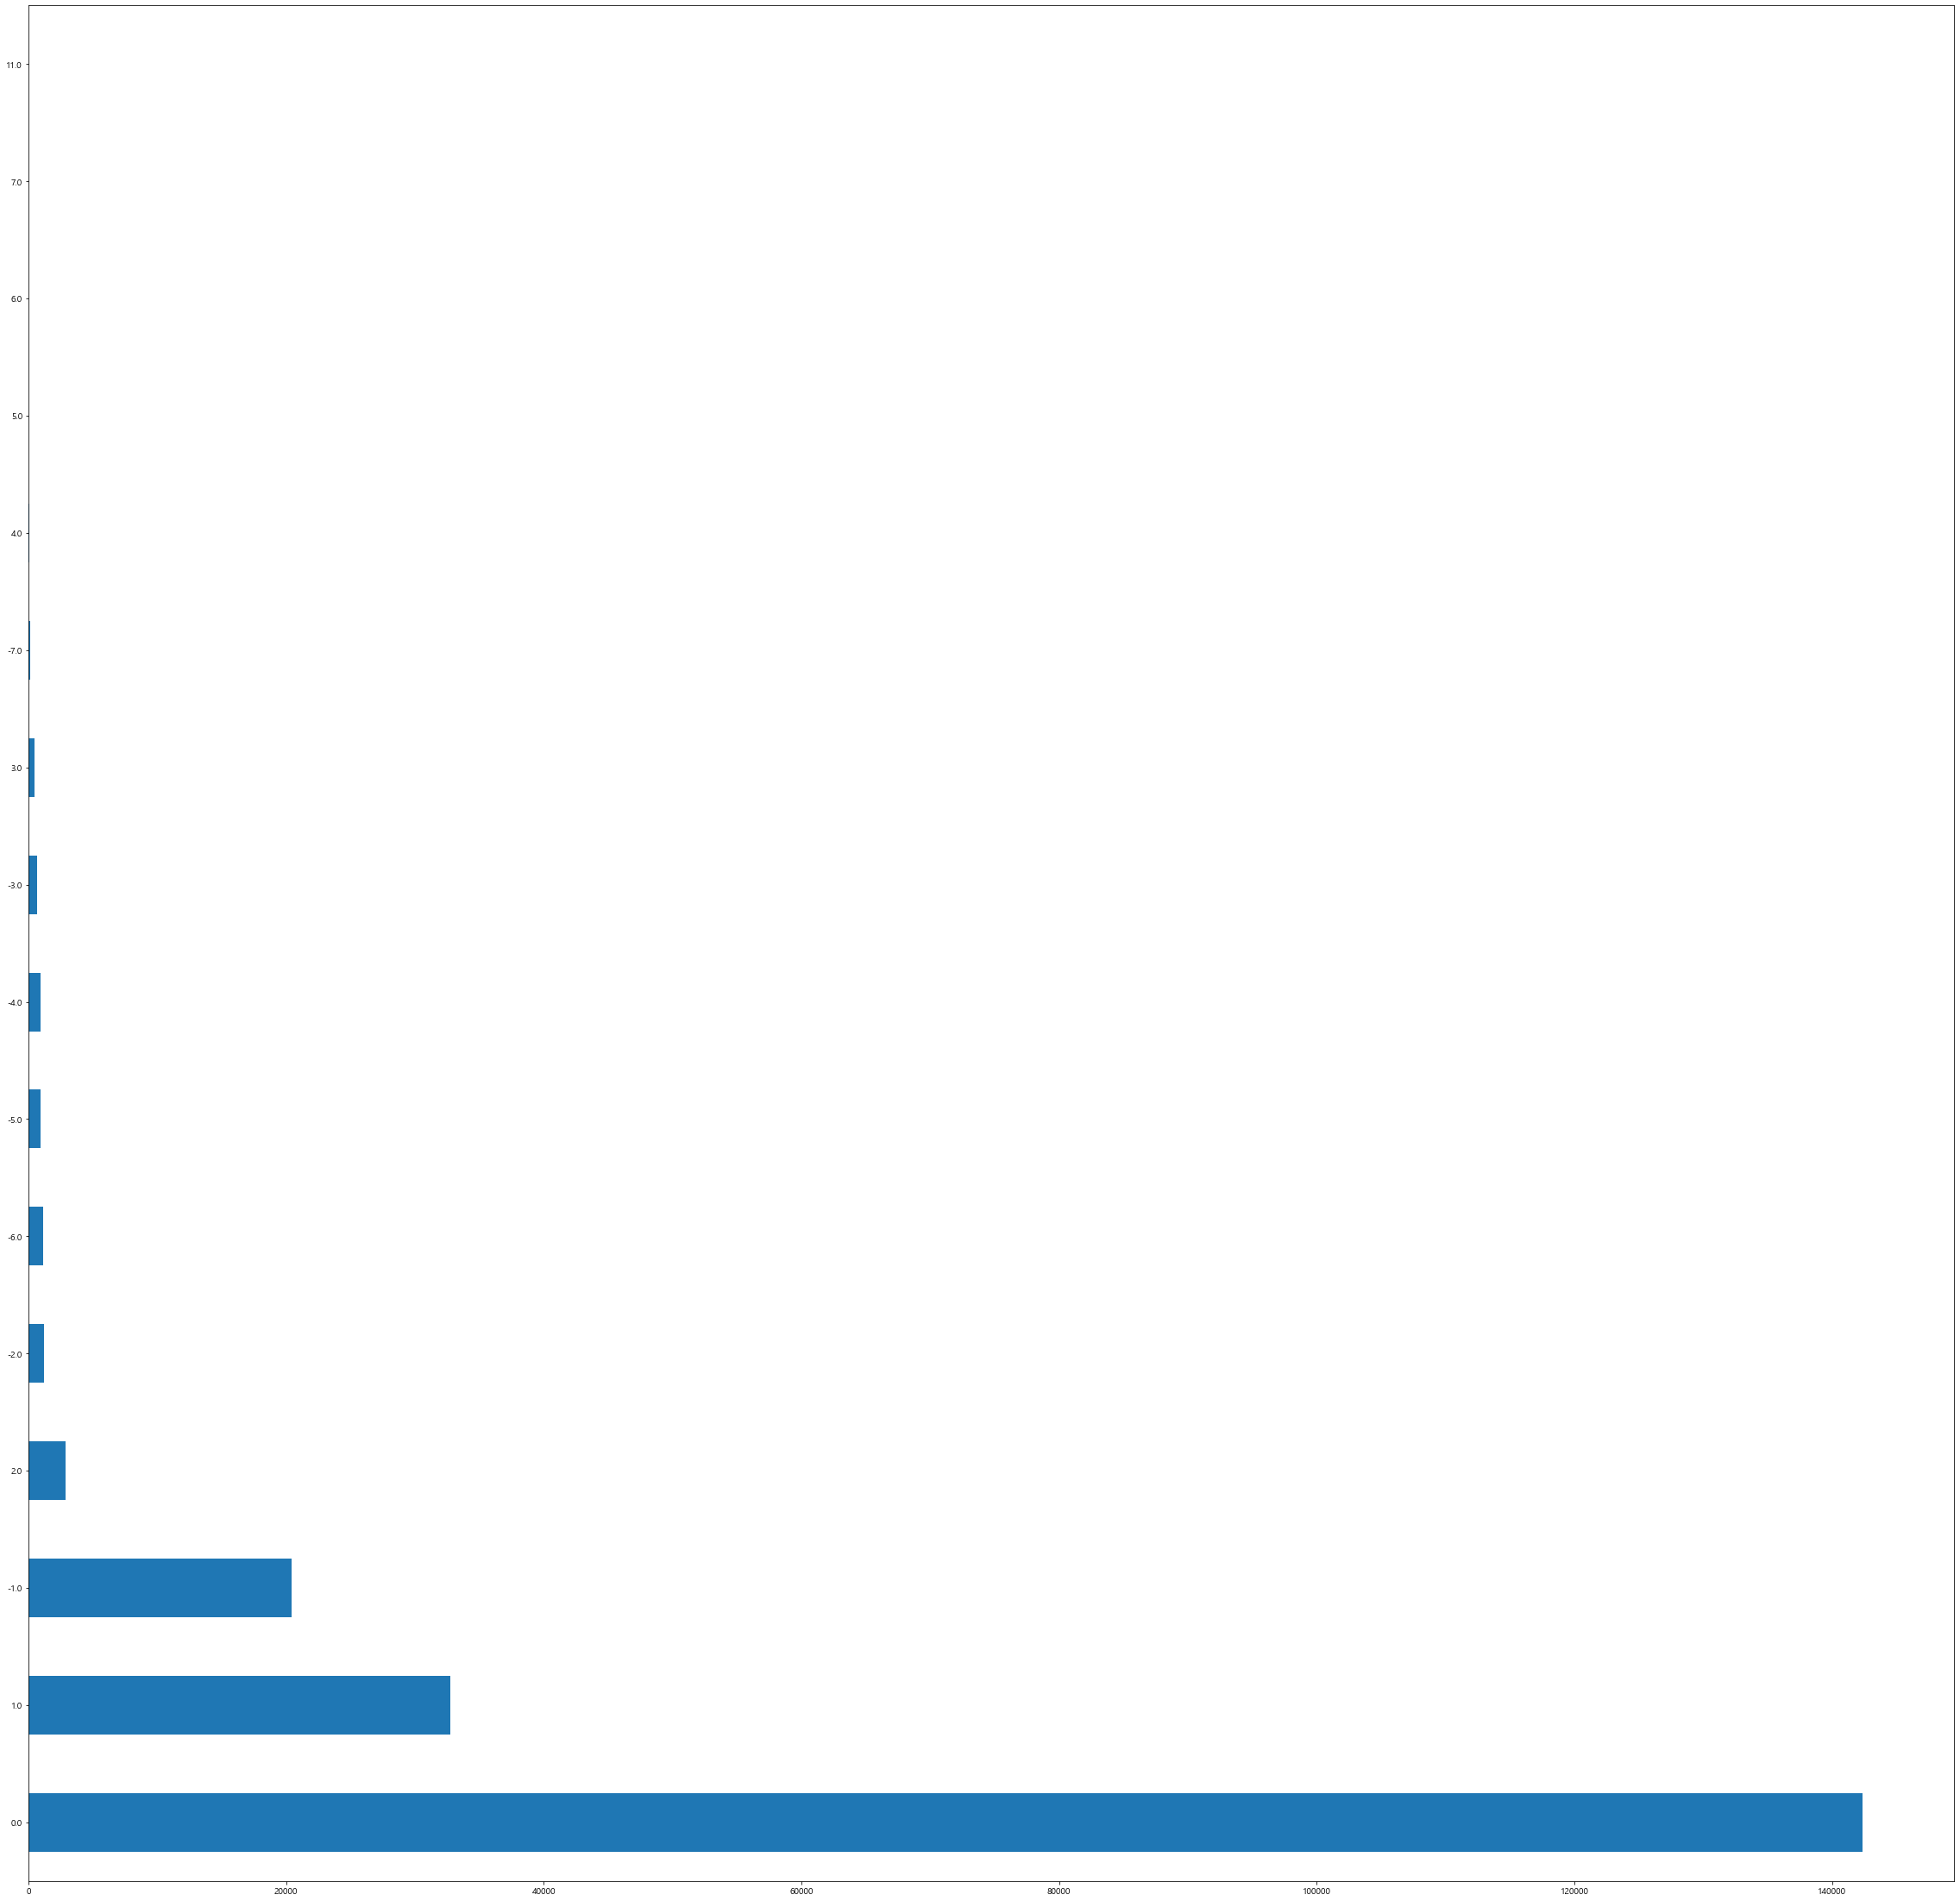

In [262]:
plt.figure(figsize=(40, 40))
df_test['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_남자.png')

In [263]:
df_test['diff_int'].value_counts(ascending=False)

 0.0     142342
 1.0      32738
-1.0      20419
 2.0       2870
-2.0       1230
-6.0       1109
-5.0        948
-4.0        944
-3.0        654
 3.0        451
-7.0        149
 4.0         60
 5.0         13
 6.0          4
 7.0          2
 11.0         1
Name: diff_int, dtype: int64

In [264]:
df_test['예측지수'].round(0).value_counts()

112.0    8868
89.0     8646
111.0    8394
88.0     8113
90.0     7862
110.0    7729
94.0     7673
106.0    7619
91.0     7281
109.0    7070
92.0     6748
105.0    6588
93.0     6540
108.0    6534
95.0     6427
107.0    6393
104.0    5929
96.0     5848
103.0    5439
97.0     5266
102.0    5030
98.0     4954
99.0     4710
101.0    4633
100.0    4298
113.0    2453
87.0     2406
85.0     1883
86.0     1851
84.0     1834
116.0    1785
115.0    1755
114.0    1735
118.0    1704
83.0     1700
119.0    1695
117.0    1664
120.0    1596
82.0     1583
81.0     1445
80.0     1337
79.0     1270
121.0    1238
78.0     1128
77.0      974
122.0     942
123.0     835
76.0      690
124.0     519
75.0      375
73.0      325
74.0      323
72.0      288
71.0      280
125.0     249
70.0      248
69.0      212
68.0      185
67.0      153
66.0      139
65.0      115
63.0       64
64.0       60
62.0       58
60.0       47
61.0       44
59.0       29
57.0       24
58.0       23
56.0       19
55.0       19
53.0  

# 예측 나이 분포

In [265]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_train_pred = model(X_train)
        X_train_pred = X_train_pred.numpy()

    df_train = pd.DataFrame(X_train_pred).reset_index(drop=True)
    y_test = pd.DataFrame(y_test.numpy())

In [266]:
if XGB_bool:
    df_train = pd.DataFrame(model.predict(X_train)).reset_index(drop=True)

In [267]:
# df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [268]:
df_plot = pd.DataFrame(y_test.value_counts())

In [269]:
df_plot.columns = ['count']

In [270]:
df_plot.reset_index(inplace=True)

In [271]:
df_plot = df_plot.sort_values('index', ascending=True)

In [272]:
df_plot

,index,count
74,51.0,1
73,52.0,8
71,53.0,12
72,54.0,10
68,55.0,25
69,56.0,22
70,57.0,15
67,58.0,31
66,59.0,32
64,60.0,46


In [273]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

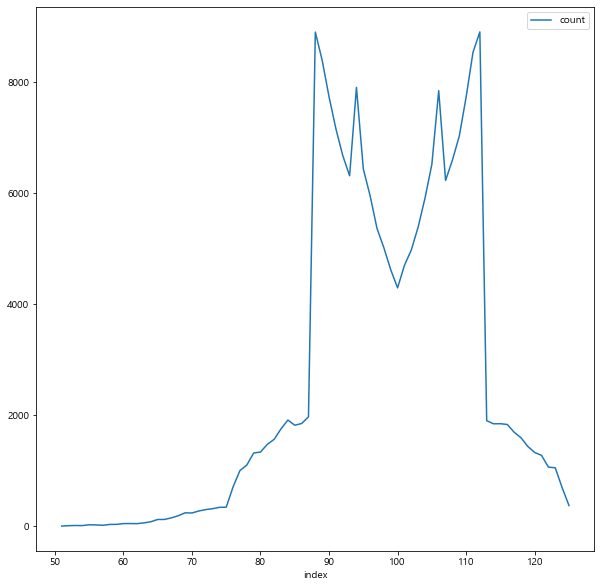

In [274]:
df_plot.plot()

In [275]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_test_pred = model(X_test)
        X_test_pred = X_test_pred.numpy()
    df_test = pd.DataFrame(X_test_pred).reset_index(drop=True)

In [276]:
if XGB_bool:
    df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [277]:
df_plot = pd.DataFrame(df_test.round(0).value_counts())

In [278]:
df_plot.columns = ['count']

In [279]:
df_plot.reset_index(inplace=True)

In [280]:
df_plot = df_plot.sort_values(0, ascending=True)

In [281]:
df_plot.set_index(0, inplace=True)

In [282]:
df_plot

,count
0,
51.0,4
52.0,3
53.0,18
54.0,11
55.0,19
56.0,19
57.0,24
58.0,23
59.0,29


<AxesSubplot:xlabel='0'>

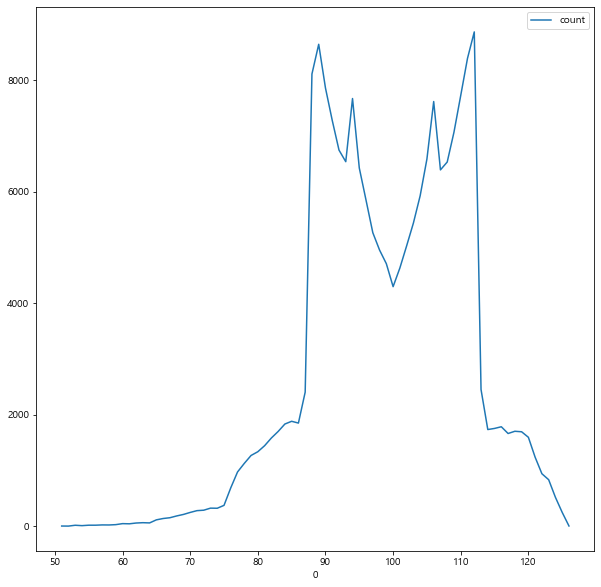

In [283]:
df_plot.plot()

# 시각화

In [284]:
# model.coef_

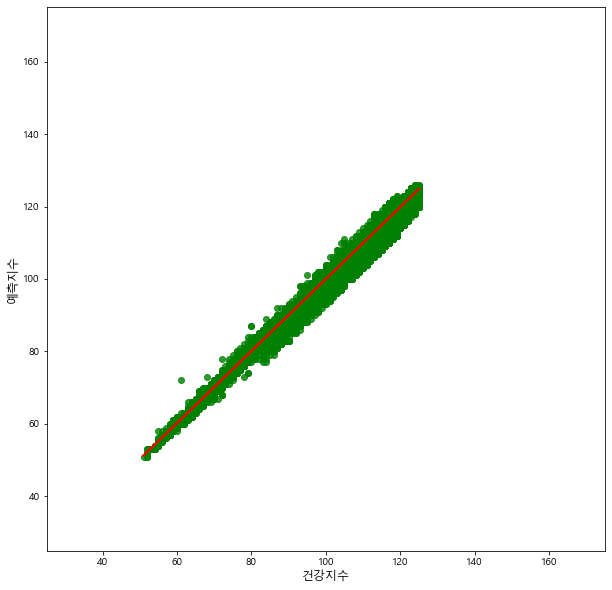

In [285]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), df_test.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 남성 데이터 전체 계산

In [286]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target
0,2011,32,11757,1,24,72.0,17.6,0.9,18.15,101.34,14.27,100.0,100.0,78.90,89.0
1,2019,50,356493,1,53,82.0,25.6,0.9,18.15,122.33,125.81,100.0,100.0,112.04,106.0
2,2021,50,642497,1,55,85.0,25.8,0.9,18.15,148.46,121.32,100.0,100.0,117.44,109.0
3,2019,62,421626,1,40,89.0,25.1,0.9,18.15,133.28,148.66,100.0,100.0,120.48,110.0
4,2020,62,565527,1,41,80.0,24.4,0.9,18.15,112.41,147.92,100.0,100.0,115.08,108.0


In [287]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616424 entries, 0 to 616423
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   검진년도            616424 non-null  int64  
 1   UID             616424 non-null  int64  
 2   CU_REC_ID       616424 non-null  int64  
 3   SEX             616424 non-null  int64  
 4   검진당시나이          616424 non-null  int64  
 5   허리둘레            616424 non-null  float64
 6   체질량지수(BMI)      616424 non-null  float64
 7   복부지방율           616424 non-null  float64
 8   체지방량            616424 non-null  float64
 9   허리둘레_kde        616424 non-null  float64
 10  체질량지수(BMI)_kde  616424 non-null  float64
 11  복부지방율_kde       616424 non-null  float64
 12  체지방량_kde        616424 non-null  float64
 13  kde_mean        616424 non-null  float64
 14  target          616424 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 70.5 MB


In [288]:
df_man[df_man['UID'] == 168996]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target
94757,2022,168996,2259500,1,35,78.0,25.1,0.84,18.15,81.67,147.36,76.79,100.0,101.46,101.0
94758,2023,168996,2259499,1,36,81.0,24.9,0.84,18.15,133.71,141.83,79.38,100.0,113.73,107.0
94759,2024,168996,2281994,1,37,77.0,24.6,0.84,18.15,78.42,149.02,64.24,100.0,97.92,99.0


In [289]:
train_columns

['검진당시나이', '허리둘레', '체질량지수(BMI)', '복부지방율', '체지방량']

In [290]:
if scaling_bool:
    df_pred = df_man_scaled.copy()
else:
    df_pred = df_man.copy()

In [291]:
len(df_pred)

616424

In [292]:
df_pred.reset_index(drop=True, inplace=True)

In [293]:
X_test

,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량
227212,42,87.0,26.00,0.90,18.15
398893,50,87.0,22.30,0.90,18.15
288574,35,83.7,26.70,0.90,16.30
110200,46,96.0,30.50,0.90,18.15
586389,57,96.0,27.40,0.90,18.15
...,...,...,...,...,...
288813,53,79.6,22.80,0.85,18.15
53417,46,103.0,28.50,0.90,18.15
449509,48,74.0,21.79,0.90,18.15
198185,43,76.0,22.20,0.90,18.15


In [294]:
df_pred.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '허리둘레', '체질량지수(BMI)',
       '복부지방율', '체지방량', '허리둘레_kde', '체질량지수(BMI)_kde', '복부지방율_kde', '체지방량_kde',
       'kde_mean', 'target'],
      dtype='object')

In [295]:
df_pred[train_columns]

,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량
0,24,72.0,17.6,0.90,18.15
1,53,82.0,25.6,0.90,18.15
2,55,85.0,25.8,0.90,18.15
3,40,89.0,25.1,0.90,18.15
4,41,80.0,24.4,0.90,18.15
...,...,...,...,...,...
616419,29,76.0,21.9,0.88,18.15
616420,39,96.0,27.7,0.90,18.15
616421,26,94.0,28.9,1.01,18.15
616422,53,81.0,25.1,0.87,18.15


In [296]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        pred_data = model(torch.Tensor(df_pred[train_columns].to_numpy()))
        pred_data = pred_data.numpy()

In [297]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_pred[train_columns])

In [298]:
pred_data = pred_data.round(0)

In [299]:
pred_data

array([ 90., 106., 109., ...,  72., 109.,  94.], dtype=float32)

In [300]:
df_output = pd.concat([df_pred, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [301]:
if scaling_bool:
    df_output = pd.concat([df_man[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output], axis=1)

In [302]:
df_output.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target,예측지수
0,2011,32,11757,1,24,72.00,17.6,0.90,18.15,101.34,14.27,100.00,100.00,78.90,89.0,90.0
1,2019,50,356493,1,53,82.00,25.6,0.90,18.15,122.33,125.81,100.00,100.00,112.04,106.0,106.0
2,2021,50,642497,1,55,85.00,25.8,0.90,18.15,148.46,121.32,100.00,100.00,117.44,109.0,109.0
3,2019,62,421626,1,40,89.00,25.1,0.90,18.15,133.28,148.66,100.00,100.00,120.48,110.0,111.0
4,2020,62,565527,1,41,80.00,24.4,0.90,18.15,112.41,147.92,100.00,100.00,115.08,108.0,108.0
5,2021,62,699357,1,42,85.00,25.4,0.90,18.15,149.73,129.70,100.00,100.00,119.86,110.0,110.0
6,2022,62,1356310,1,43,73.00,24.2,0.90,18.15,28.50,145.71,100.00,100.00,93.55,97.0,97.0
7,2023,62,2170394,1,44,74.00,24.6,0.90,18.15,38.47,149.80,100.00,100.00,97.07,99.0,99.0
8,2019,67,410099,1,51,90.00,29.5,0.90,18.15,121.70,34.63,100.00,100.00,89.08,95.0,94.0
9,2020,67,481109,1,52,92.00,29.1,0.90,18.15,112.21,39.83,100.00,100.00,88.01,94.0,94.0


## 예측지수 성능평가

In [303]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['target'], df_output['예측지수'])

0.4066486703957017

# target으로 나이 계산

In [304]:
df_output['예측나이'] = ((100 - df_output['예측지수']) / 5) + df_output['검진당시나이']
df_output['예측나이'] = df_output['예측나이'].round(2)

In [305]:
df_output.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,72.00,17.6,0.90,18.15,101.34,14.27,100.00,100.00,78.90,89.0,90.0,26.0
1,2019,50,356493,1,53,82.00,25.6,0.90,18.15,122.33,125.81,100.00,100.00,112.04,106.0,106.0,51.8
2,2021,50,642497,1,55,85.00,25.8,0.90,18.15,148.46,121.32,100.00,100.00,117.44,109.0,109.0,53.2
3,2019,62,421626,1,40,89.00,25.1,0.90,18.15,133.28,148.66,100.00,100.00,120.48,110.0,111.0,37.8
4,2020,62,565527,1,41,80.00,24.4,0.90,18.15,112.41,147.92,100.00,100.00,115.08,108.0,108.0,39.4
5,2021,62,699357,1,42,85.00,25.4,0.90,18.15,149.73,129.70,100.00,100.00,119.86,110.0,110.0,40.0
6,2022,62,1356310,1,43,73.00,24.2,0.90,18.15,28.50,145.71,100.00,100.00,93.55,97.0,97.0,43.6
7,2023,62,2170394,1,44,74.00,24.6,0.90,18.15,38.47,149.80,100.00,100.00,97.07,99.0,99.0,44.2
8,2019,67,410099,1,51,90.00,29.5,0.90,18.15,121.70,34.63,100.00,100.00,89.08,95.0,94.0,52.2
9,2020,67,481109,1,52,92.00,29.1,0.90,18.15,112.21,39.83,100.00,100.00,88.01,94.0,94.0,53.2


## 예측나이 성능평가

In [306]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['검진당시나이'], df_output['예측나이'])

1.811004762955369

# 최종 산출

In [307]:
df_output.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,72.0,17.6,0.9,18.15,101.34,14.27,100.0,100.0,78.90,89.0,90.0,26.0
1,2019,50,356493,1,53,82.0,25.6,0.9,18.15,122.33,125.81,100.0,100.0,112.04,106.0,106.0,51.8
2,2021,50,642497,1,55,85.0,25.8,0.9,18.15,148.46,121.32,100.0,100.0,117.44,109.0,109.0,53.2
3,2019,62,421626,1,40,89.0,25.1,0.9,18.15,133.28,148.66,100.0,100.0,120.48,110.0,111.0,37.8
4,2020,62,565527,1,41,80.0,24.4,0.9,18.15,112.41,147.92,100.0,100.0,115.08,108.0,108.0,39.4


# DataMart csv

In [308]:
df_copy = df.copy()

In [309]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량
0,2010,7282,2520,1,42,NaN,NaN,NaN,NaN
1,2010,7490,3638,1,39,NaN,NaN,NaN,NaN
2,2010,7915,3997,1,36,NaN,NaN,NaN,NaN
3,2010,8056,4745,1,42,80.0,NaN,NaN,NaN
4,2010,8457,3929,1,38,NaN,NaN,NaN,NaN


In [310]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   검진년도        1213899 non-null  int64  
 1   UID         1213899 non-null  int64  
 2   CU_REC_ID   1213899 non-null  int64  
 3   SEX         1213899 non-null  int64  
 4   검진당시나이      1213899 non-null  int64  
 5   허리둘레        1148453 non-null  float64
 6   체질량지수(BMI)  1162058 non-null  float64
 7   복부지방율       265769 non-null   float64
 8   체지방량        256065 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 83.4 MB


In [311]:
minimums

[49.75, 14.214999999999995, 0.7199999999999999, 1.7500000000000018]

In [312]:
maximums

[111.75, 33.37500000000001, 1.04, 34.15]

In [313]:
train_columns

['검진당시나이', '허리둘레', '체질량지수(BMI)', '복부지방율', '체지방량']

In [314]:
target_cols

['허리둘레', '체질량지수(BMI)', '복부지방율', '체지방량']

In [315]:
for idx, col in enumerate(target_cols):    
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [316]:
df_man_csv = df_copy[df_copy['SEX'] == 1]
len(df_man_csv)

765459

In [317]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량
0,2010,7282,2520,1,42,NaN,NaN,NaN,NaN
1,2010,7490,3638,1,39,NaN,NaN,NaN,NaN
2,2010,7915,3997,1,36,NaN,NaN,NaN,NaN
3,2010,8056,4745,1,42,80.0,NaN,NaN,NaN
4,2010,8457,3929,1,38,NaN,NaN,NaN,NaN


## 검진 항목 all 결측치 지우기

In [318]:
target_cols

['허리둘레', '체질량지수(BMI)', '복부지방율', '체지방량']

In [319]:
df_man_csv.dropna(subset=target_cols, how='all', inplace=True)

In [320]:
df_man_csv.reset_index(drop=True, inplace=True)

In [321]:
len(df_man_csv)

752584

## fillna

In [322]:
df_man_csv.fillna(df_man.mean().round(2), inplace=True)

## 스크리닝

In [323]:
# screening = 80

In [324]:
# scr_col = 'ALP'

In [325]:
# df_man_csv[df_man_csv[scr_col] < screening].head()

In [326]:
# len(df_man_csv[df_man_csv[scr_col] < screening])

In [327]:
# df_man_csv.loc[df_man_csv[scr_col] < screening, scr_col] = screening

In [328]:
# df_man_csv[df_man_csv[scr_col] < screening].head()

In [329]:
# len(df_man_csv[df_man_csv[scr_col] < screening])

In [330]:
# len(df_man_csv)

## 모델 예측

In [331]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_man_csv[train_columns])

In [332]:
pred_data = pred_data.round(0)

In [333]:
df_man_csv = pd.concat([df_man_csv, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [334]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,예측지수
0,2010,8056,4745,1,42,80.0,24.97,0.90,18.16,101.0
1,2010,15783,1431,1,41,96.0,32.10,0.90,18.16,86.0
2,2011,123463,10799,1,39,86.0,23.10,0.90,18.16,109.0
3,2011,135154,6627,1,28,100.0,24.20,0.89,18.80,97.0
4,2010,16844,4411,1,37,85.0,24.97,0.90,18.16,106.0


### 성능 평가

In [335]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_man_csv['target'], df_man_csv['예측지수']))

In [336]:
# r2_score(df_man_csv['target'], df_man_csv['예측지수'])

## 예측나이 계산

In [337]:
df_man_csv['예측나이'] = ((100 - df_man_csv['예측지수']) / 5) + df_man_csv['검진당시나이']
df_man_csv['예측나이'] = df_man_csv['예측나이'].round(2)

### 성능 평가

In [338]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_man_csv['검진당시나이'], df_man_csv['예측나이']))

MAE : 1.9470339523561482


In [339]:
r2_score(df_man_csv['검진당시나이'], df_man_csv['예측나이'])

0.9266471122515516

In [340]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,예측지수,예측나이
0,2010,8056,4745,1,42,80.0,24.97,0.90,18.16,101.0,41.8
1,2010,15783,1431,1,41,96.0,32.10,0.90,18.16,86.0,43.8
2,2011,123463,10799,1,39,86.0,23.10,0.90,18.16,109.0,37.2
3,2011,135154,6627,1,28,100.0,24.20,0.89,18.80,97.0,28.6
4,2010,16844,4411,1,37,85.0,24.97,0.90,18.16,106.0,35.8


In [341]:
df_man_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752584 entries, 0 to 752583
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   검진년도        752584 non-null  int64  
 1   UID         752584 non-null  int64  
 2   CU_REC_ID   752584 non-null  int64  
 3   SEX         752584 non-null  int64  
 4   검진당시나이      752584 non-null  int64  
 5   허리둘레        752584 non-null  float64
 6   체질량지수(BMI)  752584 non-null  float64
 7   복부지방율       752584 non-null  float64
 8   체지방량        752584 non-null  float64
 9   예측지수        752584 non-null  float32
 10  예측나이        752584 non-null  float64
dtypes: float32(1), float64(5), int64(5)
memory usage: 60.3 MB


# 최종 UID별 확인

In [342]:
# 김태현 본부장님
df_man_csv[df_man_csv['UID'] == 175673].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,예측지수,예측나이
278752,2022,175673,751348,1,48,80.5,25.0,0.88,18.16,112.0,45.6
278753,2022,175673,1463838,1,48,80.5,25.0,0.88,18.16,112.0,45.6
278689,2022,175673,1919125,1,48,80.5,25.0,0.88,18.16,112.0,45.6
278754,2022,175673,2169120,1,48,80.5,25.0,0.88,18.16,112.0,45.6
278690,2022,175673,2223795,1,48,80.5,25.0,0.88,18.16,112.0,45.6
278691,2022,175673,2237465,1,48,80.5,25.0,0.88,18.16,112.0,45.6
278755,2022,175673,2238320,1,48,80.5,25.0,0.88,18.16,112.0,45.6
278756,2022,175673,2246042,1,48,80.5,25.0,0.88,18.16,112.0,45.6
447332,2023,175673,1463893,1,49,76.0,24.4,0.88,18.16,105.0,48.0
447328,2023,175673,1919126,1,49,76.0,24.4,0.88,18.16,105.0,48.0


In [343]:
# 양원영 유닛장님
df_man_csv[df_man_csv['UID'] == 289587].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,예측지수,예측나이
201155,2021,289587,796178,1,47,81.0,22.7,0.89,18.16,109.0,45.2
311727,2022,289587,866076,1,48,86.0,22.4,0.90,18.16,107.0,46.6
311682,2022,289587,2115999,1,48,86.0,22.4,0.90,18.16,107.0,46.6
103635,2022,289587,2603574,1,48,86.0,22.4,0.90,18.16,107.0,46.6
498609,2023,289587,1487447,1,49,85.0,23.2,0.89,18.16,116.0,45.8
498610,2023,289587,2227964,1,49,85.0,23.2,0.89,18.16,116.0,45.8
688081,2024,289587,2243723,1,50,82.0,23.2,0.92,18.16,114.0,47.2
688059,2024,289587,2603575,1,50,82.0,23.2,0.92,18.16,114.0,47.2


In [344]:
# 한...
df_man_csv[df_man_csv['UID'] == 897603].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,예측지수,예측나이
416204,2022,897603,1066133,1,51,87.0,26.3,0.95,18.16,104.0,50.2
416217,2022,897603,1068885,1,51,87.0,26.3,0.95,18.16,104.0,50.2
416219,2022,897603,1728532,1,51,87.0,26.3,0.95,18.16,104.0,50.2
416220,2022,897603,2555144,1,51,87.0,26.3,0.95,18.16,104.0,50.2
592965,2023,897603,1458387,1,52,93.0,26.8,0.97,18.16,95.0,53.0
592967,2023,897603,1728531,1,52,93.0,26.8,0.97,18.16,95.0,53.0
581503,2023,897603,2120063,1,52,93.0,26.8,0.97,18.16,95.0,53.0
581504,2023,897603,2351665,1,52,93.0,26.8,0.97,18.16,95.0,53.0
592968,2023,897603,2555143,1,52,93.0,26.8,0.97,18.16,95.0,53.0
581505,2023,897603,2622260,1,52,93.0,26.8,0.97,18.16,95.0,53.0


In [345]:
# 김명근 팀장님
df_man_csv[df_man_csv['UID'] == 119172].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,예측지수,예측나이
262251,2022,119172,751336,1,41,92.0,25.8,0.95,18.16,103.0,40.4
262252,2022,119172,1432355,1,41,92.0,25.8,0.95,18.16,103.0,40.4
262249,2022,119172,1432476,1,41,92.0,25.8,0.95,18.16,103.0,40.4
262253,2022,119172,2247083,1,41,92.0,25.8,0.95,18.16,103.0,40.4
262254,2022,119172,2252956,1,41,92.0,25.8,0.95,18.16,103.0,40.4
432978,2023,119172,1436742,1,42,96.0,26.9,0.96,18.16,94.0,43.2
432979,2023,119172,2247082,1,42,96.0,26.9,0.96,18.16,94.0,43.2
432980,2023,119172,2252955,1,42,96.0,26.9,0.96,18.16,94.0,43.2
669622,2024,119172,2250063,1,43,95.0,27.3,0.96,18.16,93.0,44.4
669623,2024,119172,2252954,1,43,95.0,27.3,0.96,18.16,93.0,44.4


In [346]:
# 성주용
df_man_csv[df_man_csv['UID'] == 897595].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,예측지수,예측나이
592960,2023,897595,1525045,1,40,91.0,26.1,0.87,18.16,107.0,38.6
592961,2023,897595,1593851,1,40,91.0,26.1,0.87,18.16,107.0,38.6
592958,2023,897595,2005289,1,40,91.0,26.1,0.87,18.16,107.0,38.6
592959,2023,897595,2138998,1,40,91.0,26.1,0.87,18.16,107.0,38.6
577051,2023,897595,2320478,1,40,91.0,26.1,0.87,18.16,107.0,38.6
592962,2023,897595,2328772,1,40,91.0,26.1,0.87,18.16,107.0,38.6
730183,2024,897595,2329051,1,41,84.0,24.9,0.88,18.16,114.0,38.2


In [347]:
# 최재..
df_man_csv[df_man_csv['UID'] == 492764].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,예측지수,예측나이
363031,2022,492764,909688,1,39,86.0,26.6,0.91,18.16,113.0,36.4
363032,2022,492764,1575802,1,39,86.0,26.6,0.91,18.16,113.0,36.4
363035,2022,492764,1668547,1,39,86.0,26.6,0.91,18.16,113.0,36.4
363033,2022,492764,2246777,1,39,86.0,26.6,0.91,18.16,113.0,36.4
363034,2022,492764,2330256,1,39,86.0,26.6,0.91,18.16,113.0,36.4
151792,2022,492764,2343199,1,39,86.0,26.6,0.91,18.16,113.0,36.4
170090,2022,492764,2363393,1,39,86.0,26.6,0.91,18.16,113.0,36.4
170091,2022,492764,2639564,1,39,86.0,26.6,0.91,18.16,113.0,36.4
170092,2022,492764,2703924,1,39,86.0,26.6,0.91,18.16,113.0,36.4
363036,2022,492764,2783328,1,39,86.0,26.6,0.91,18.16,113.0,36.4


In [348]:
# 장경..
df_man_csv[df_man_csv['UID'] == 933936].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,예측지수,예측나이
597382,2023,933936,1431742,1,40,92.0,28.5,0.99,18.16,85.0,43.0
597383,2023,933936,1435266,1,40,92.0,28.5,0.99,18.16,85.0,43.0
731525,2024,933936,2242997,1,41,96.0,29.7,0.99,18.16,84.0,44.2


In [349]:
df_man_csv[df_man_csv['UID'] == 168996].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,예측지수,예측나이
276205,2022,168996,919754,1,35,78.0,25.1,0.84,18.16,103.0,34.4
276206,2022,168996,1425925,1,35,78.0,25.1,0.84,18.16,103.0,34.4
276207,2022,168996,2259500,1,35,78.0,25.1,0.84,18.16,103.0,34.4
445060,2023,168996,1425970,1,36,81.0,24.9,0.84,18.16,106.0,34.8
445061,2023,168996,1475832,1,36,81.0,24.9,0.84,18.16,106.0,34.8
445062,2023,168996,2259499,1,36,81.0,24.9,0.84,18.16,106.0,34.8
674859,2024,168996,2281994,1,37,77.0,24.6,0.84,18.16,101.0,36.8


# 여성 모델

In [350]:
df_target['SEX'].value_counts()

1    743380
2    436769
Name: SEX, dtype: int64

In [351]:
df_woman = df_target[df_target['SEX'] == 2]
len(df_woman)

436769

# 결측치 처리

## 결측치 삭제

In [352]:
# df_woman.dropna(inplace=True)

In [353]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target
784807,2010,710490,213,2,28,76.4,NaN,0.83,NaN,65.65,100.00,149.95,100.0,103.90,102.0
746739,2010,315847,230,2,23,79.5,NaN,0.79,NaN,40.27,100.00,78.09,100.0,79.59,90.0
749067,2010,719072,231,2,24,71.2,NaN,0.78,NaN,101.13,100.00,85.62,100.0,96.69,98.0
1007804,2010,552037,332,2,41,70.0,18.2,NaN,NaN,149.44,74.57,100.00,100.0,106.00,103.0
784808,2010,710522,632,2,28,NaN,18.6,NaN,NaN,100.00,110.63,100.00,100.0,102.66,101.0


## 결측치 평균으로 대체

In [354]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [355]:
# 나이로 group by, 결측치를 평균으로 대체
# df_woman = df_woman.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [356]:
target_cols

['허리둘레', '체질량지수(BMI)', '복부지방율', '체지방량']

In [357]:
len(df_woman)

436769

In [358]:
df_woman.dropna(subset=target_cols, how='all', inplace=True)

In [359]:
len(df_woman)

428532

In [360]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target
784807,2010,710490,213,2,28,76.4,NaN,0.83,NaN,65.65,100.00,149.95,100.0,103.90,102.0
746739,2010,315847,230,2,23,79.5,NaN,0.79,NaN,40.27,100.00,78.09,100.0,79.59,90.0
749067,2010,719072,231,2,24,71.2,NaN,0.78,NaN,101.13,100.00,85.62,100.0,96.69,98.0
1007804,2010,552037,332,2,41,70.0,18.2,NaN,NaN,149.44,74.57,100.00,100.0,106.00,103.0
784808,2010,710522,632,2,28,NaN,18.6,NaN,NaN,100.00,110.63,100.00,100.0,102.66,101.0


In [361]:
len(df_woman)

428532

## fillna

In [362]:
df_woman.mean().round(2)

검진년도                 2021.86
UID                500652.74
CU_REC_ID         1495233.12
SEX                     2.00
검진당시나이                 38.60
허리둘레                   72.45
체질량지수(BMI)             21.78
복부지방율                   0.85
체지방량                   17.39
허리둘레_kde              104.11
체질량지수(BMI)_kde        100.68
복부지방율_kde             100.73
체지방량_kde              101.08
kde_mean              101.65
target                100.82
dtype: float64

In [363]:
df_woman.fillna(df_woman.mean().round(2), inplace=True)

In [364]:
# df_woman.fillna(0, inplace=True)

## IterativeImputer

In [365]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_woman))
# df_impute.columns = df_woman.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [366]:
# import time
# start = time.time()
# np_imputed = mice(df_woman.values) # mice 학습시작
# df_woman = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

In [367]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target
784807,2010,710490,213,2,28,76.40,21.78,0.83,17.39,65.65,100.00,149.95,100.0,103.90,102.0
746739,2010,315847,230,2,23,79.50,21.78,0.79,17.39,40.27,100.00,78.09,100.0,79.59,90.0
749067,2010,719072,231,2,24,71.20,21.78,0.78,17.39,101.13,100.00,85.62,100.0,96.69,98.0
1007804,2010,552037,332,2,41,70.00,18.20,0.85,17.39,149.44,74.57,100.00,100.0,106.00,103.0
784808,2010,710522,632,2,28,72.45,18.60,0.85,17.39,100.00,110.63,100.00,100.0,102.66,101.0


# 스크리닝

## 스크리닝

In [368]:
# screening = 80

In [369]:
# scr_col = 'ALP'

In [370]:
# df_woman[df_woman[scr_col] < screening].head()

In [371]:
# len(df_woman[df_woman[scr_col] < screening])

In [372]:
# df_woman.loc[df_woman[scr_col] < screening, scr_col] = screening

In [373]:
# df_woman[df_woman[scr_col] < screening].head()

In [374]:
# len(df_woman[df_woman[scr_col] < screening])

# 중복 제거

In [375]:
len(df_woman)

428532

In [376]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_woman.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [377]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target
882873,2022,48,1140655,2,34,77.0,26.00,0.85,17.39,81.48,28.77,100.00,100.00,77.56,89.0
902898,2023,48,2484053,2,35,88.0,21.78,0.85,17.39,17.05,100.00,100.00,100.00,79.26,90.0
764223,2021,53,2632765,2,26,76.0,23.20,0.89,17.39,56.63,50.48,35.11,100.00,60.56,80.0
764222,2021,53,664316,2,26,76.0,23.20,0.89,17.39,56.63,50.48,35.11,100.00,60.56,80.0
790029,2023,53,2632764,2,28,72.0,23.40,0.85,17.39,122.83,56.45,100.00,100.00,94.82,97.0
812959,2024,53,2658222,2,29,72.0,22.60,0.87,17.39,101.94,72.98,74.78,100.00,87.43,94.0
816858,2020,54,497669,2,30,75.0,22.70,0.85,19.10,78.25,80.16,100.00,77.56,83.99,92.0
854255,2022,54,1319859,2,32,79.0,25.14,0.85,17.39,54.22,35.72,100.00,100.00,72.48,86.0
873536,2023,54,2039511,2,33,89.7,24.37,0.85,17.39,9.88,47.19,100.00,100.00,64.27,82.0
895550,2024,54,2750990,2,34,77.0,24.80,0.85,23.90,81.48,38.15,100.00,57.47,69.28,85.0


## first만 남겨두고 중복 제거

In [378]:
df_woman = df_woman.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [379]:
df_woman.reset_index(drop=True, inplace=True)

# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

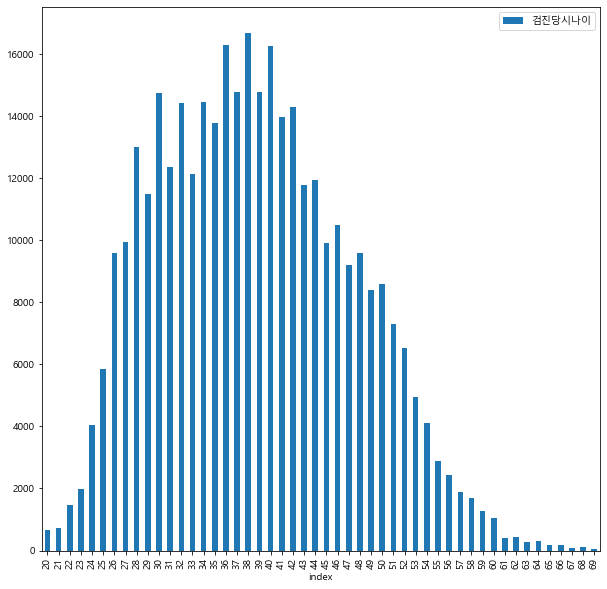

In [380]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [381]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
40,20,647
39,21,717
36,22,1455
33,23,1974
30,24,4040
27,25,5851
20,26,9590
18,27,9950
11,28,13002
16,29,11482


# 검진항목 시각화

In [382]:
df_woman.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target
count,363687.000000,3.636870e+05,3.636870e+05,363687.0,363687.000000,363687.000000,363687.000000,363687.000000,363687.000000,363687.000000,363687.000000,363687.000000,363687.000000,363687.000000,363687.000000
mean,2021.801365,4.960323e+05,1.485249e+06,2.0,38.629514,72.467308,21.792236,0.849489,17.408211,104.007945,100.553784,100.511335,100.825313,101.474605,100.733669
std,1.728309,3.665528e+05,8.064505e+05,0.0,8.588660,7.917657,2.996556,0.022747,2.392654,42.093454,43.695170,19.088478,18.703525,22.119182,11.057818
min,2010.000000,4.800000e+01,2.130000e+02,2.0,20.000000,49.800000,14.300000,0.720000,1.800000,0.000000,0.080000,0.040000,0.000000,3.930000,52.000000
25%,2021.000000,2.157130e+05,6.541020e+05,2.0,32.000000,67.000000,19.700000,0.850000,17.390000,75.240000,67.800000,100.000000,100.000000,88.360000,94.000000
50%,2022.000000,3.703500e+05,1.393807e+06,2.0,38.000000,72.000000,21.300000,0.850000,17.390000,115.290000,111.110000,100.000000,100.000000,106.640000,103.000000
75%,2023.000000,8.237140e+05,2.178384e+06,2.0,45.000000,77.000000,23.300000,0.850000,17.390000,141.360000,140.345000,100.000000,100.000000,118.240000,109.000000
max,2024.000000,1.473631e+06,2.871442e+06,2.0,69.000000,111.700000,33.370000,1.040000,34.100000,150.010000,150.060000,150.000000,150.020000,149.920000,125.000000


<AxesSubplot:xlabel='검진당시나이'>

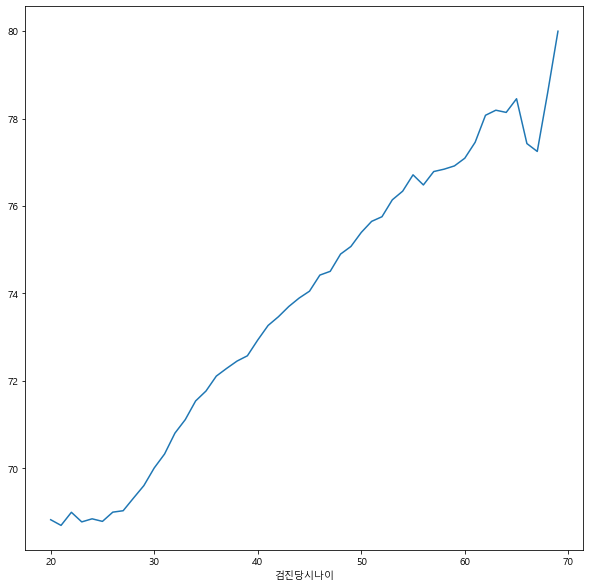

In [383]:
df_woman.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

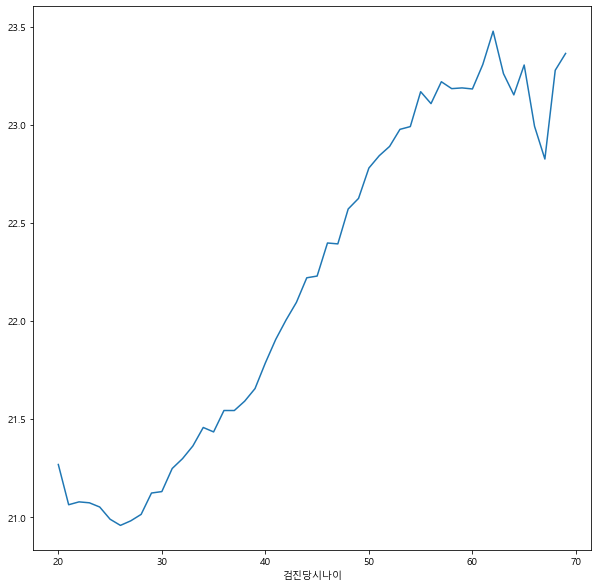

In [384]:
df_woman.groupby('검진당시나이').mean()[target_cols[1]].plot()

In [385]:
# df_woman.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

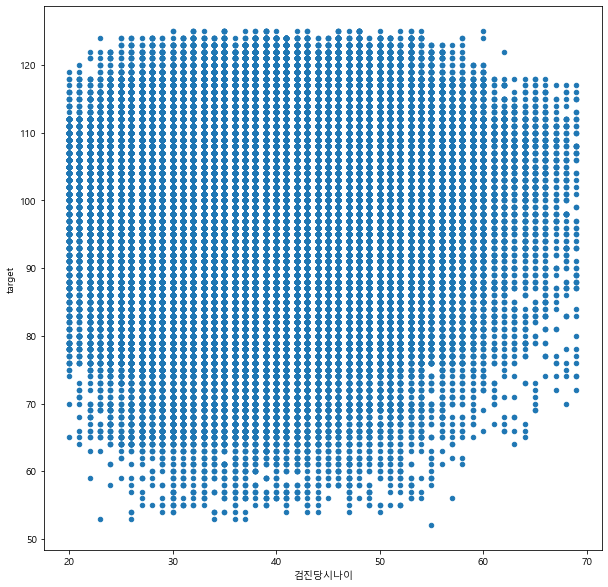

In [386]:
df_woman.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

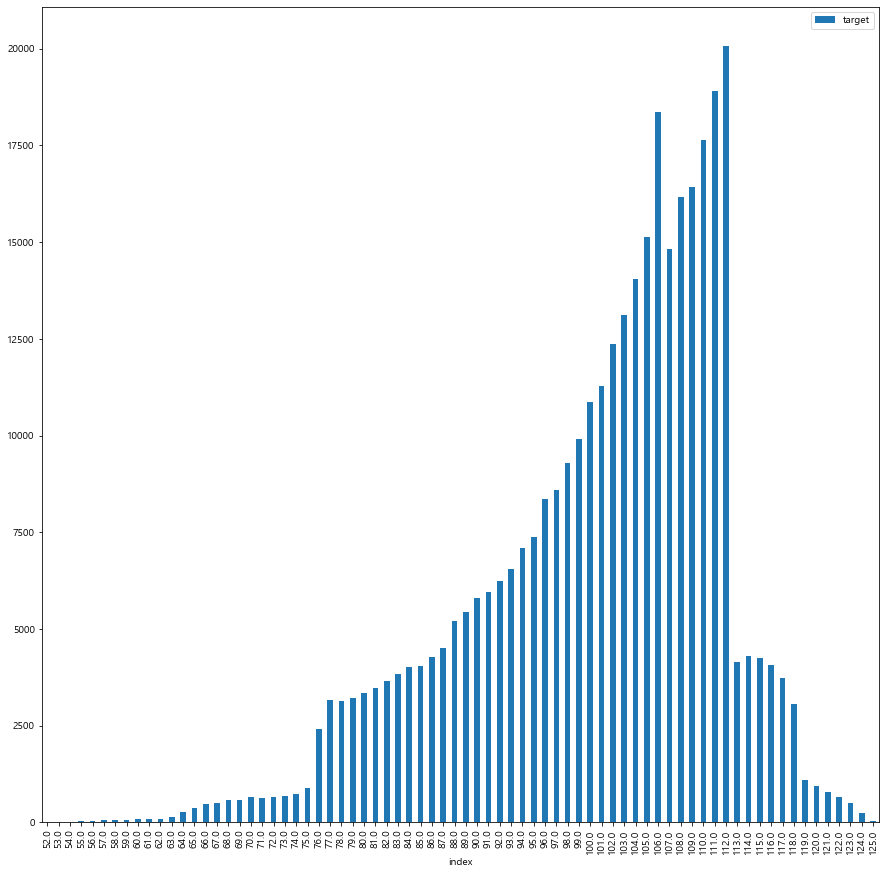

In [387]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [388]:
df_woman['target'].value_counts().reset_index().sort_values('index')

,index,target
73,52.0,1
72,53.0,5
71,54.0,17
70,55.0,36
68,56.0,49
67,57.0,57
65,58.0,69
66,59.0,68
64,60.0,78
62,61.0,98


In [389]:
df_woman_sampling = pd.DataFrame()

# for target in range(int(df_woman['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_woman[df_woman['target'] == target])
    right_len = len(df_woman[df_woman['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == 100]])                    

In [390]:
# df_woman = df_woman_sampling.copy()

<AxesSubplot:xlabel='index'>

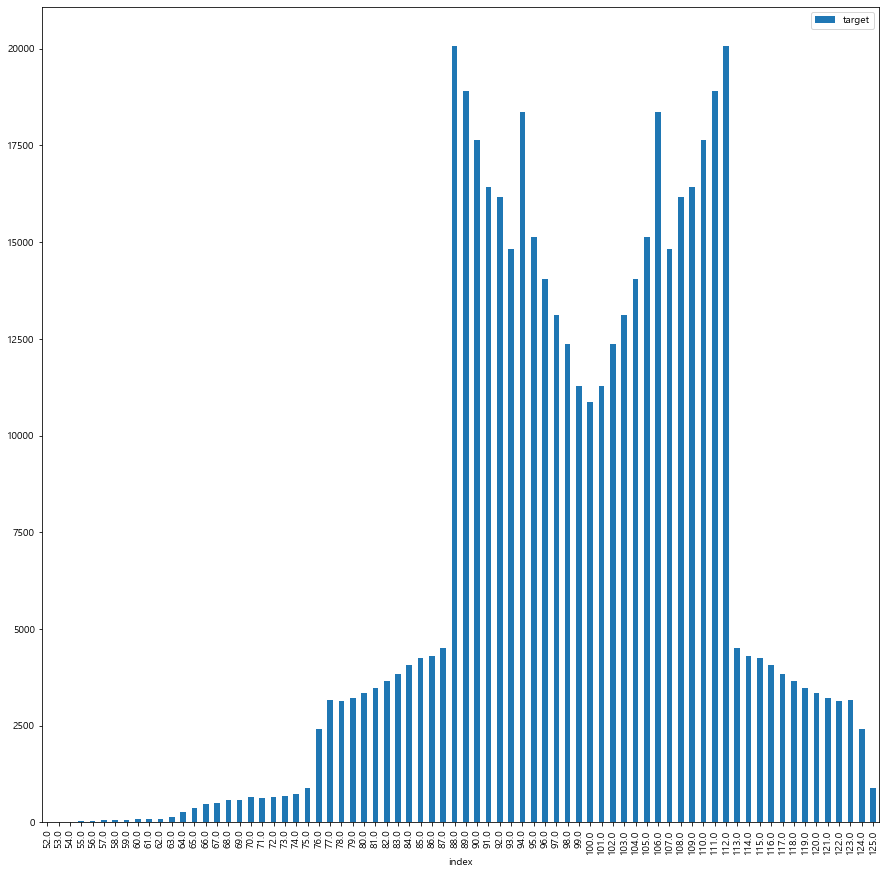

In [391]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [392]:
df_woman_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
73,52.0,1
72,53.0,5
71,54.0,17
70,55.0,36
69,56.0,49
68,57.0,57
66,58.0,69
67,59.0,68
65,60.0,78
63,61.0,98


# 나이별 확인하기

In [393]:
# df_woman['검진당시나이'].value_counts()

In [394]:
# int(df_woman['검진당시나이'].value_counts().mean())

In [395]:
# df_woman['검진당시나이'].min()

In [396]:
# df_woman['검진당시나이'].max()

In [397]:
# df_woman.columns

In [398]:
# df_temp = None
# # sample_len = int(df_woman['검진당시나이'].value_counts().mean())
# # sample_len = 500
                 
# for age in range(df_woman['검진당시나이'].min(), df_woman['검진당시나이'].max()):
#     temp_ = df_woman[df_woman['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [399]:
# df_temp.info()

In [400]:
# df_temp.reset_index(drop=True, inplace=True)

In [401]:
# df_woman = df_temp.copy()

In [402]:
# df_woman['검진당시나이'].value_counts()

In [403]:
# df_woman[df_woman['검진당시나이']==20]

In [404]:
# df_woman[df_woman['검진당시나이']==20]['UID'].value_counts()

# model train

In [405]:
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '신장', '체중']
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '체중']

In [406]:
train_columns

['검진당시나이', '허리둘레', '체질량지수(BMI)', '복부지방율', '체지방량']

In [407]:
# target_col = '검진당시나이'

In [408]:
target_col

'target'

## Min Max Scaling

In [409]:
from sklearn.preprocessing import MinMaxScaler

In [410]:
scaling_bool

False

In [411]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_woman_sampling[train_columns])
    df_woman_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

In [412]:
if scaling_bool:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_scaled[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [413]:
# model2 = LinearRegression()

In [414]:
# model2.fit(X_train2, y_train2)

In [415]:
# model2.intercept_

In [416]:
# model2.coef_

## Randomized SearchCV, 파라미터 튜닝

In [417]:
model2 = XGBRegressor()

In [418]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [419]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model2, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [420]:
import time
start = time.time()
random_search.fit(X_train2, y_train2)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

RandomizedSearchCV took 1680.13 seconds for 10 candidates parameter settings.


In [421]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.4,
 'booster': 'gbtree'}

In [422]:
# best score
random_search.best_score_

-0.6416126921060401

In [423]:
model2 = random_search.best_estimator_
model2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.4,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.400000006,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [424]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [425]:
# model = build_model()

In [426]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [427]:
# model.summary()

In [428]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [429]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [430]:
# plot_history(history)

## pyTorch 신경망

In [431]:
np.shape(X_train)[1]

5

In [432]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [433]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [434]:
# epochs = 1000

In [435]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [436]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [437]:
# plt.plot(losses)

## coef 계산

In [438]:
# df_coef2 = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model2.coef_).reset_index(drop=True)], axis=1)

In [439]:
# df_coef2.columns = ['검사항목', 'coef']

In [440]:
# df_coef2['coef'] = df_coef2['coef'].round(4)

In [441]:
# df_coef2['abs_coef'] = df_coef2['coef'].abs()

In [442]:
# df_coef2.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [443]:
# from sklearn.preprocessing import PolynomialFeatures
# poly2 = PolynomialFeatures(degree=1, include_bias=False)

In [444]:
# X_train2_poly = poly2.fit_transform(X_train2)
# X_test2_poly = poly2.fit_transform(X_test2)

In [445]:
# slr2 = LinearRegression()

In [446]:
# slr2.fit(X_train2_poly, y_train2)

In [447]:
# np.shape(X_train2)

In [448]:
# np.shape(X_train2_poly)

In [449]:
# np.shape(X_test2)

In [450]:
# np.shape(X_test2_poly)

In [451]:
# y_pred2_poly = slr2.predict(X_test2_poly)

In [452]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test2, y_pred2_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test2, y_pred2_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2_poly)))

In [453]:
# from sklearn.metrics import r2_score
# r2_score(y_test2, y_pred2_poly)

# model save

In [454]:
import pickle
with open(model_path_woman,'wb') as f:
    pickle.dump(model2, f)

In [455]:
import pickle
with open(model_path_woman, 'rb') as f:
    model2 = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [456]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model2.eval()
        y_pred2 = model2(X_test2)
        y_pred2 = y_pred2.numpy()

## XGBRegressor

In [457]:
if XGB_bool:
    y_pred2 = model2.predict(X_test2)

In [458]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test2, y_pred2))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test2, y_pred2))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2)))

MAE : 0.486398060284484
MSE : 0.6357610135561897
RMSE : 0.7973462319194778


In [459]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

0.9948899873637312

In [460]:
model2.score(X_test2, y_test2)

0.9948899873637312

## feature importance

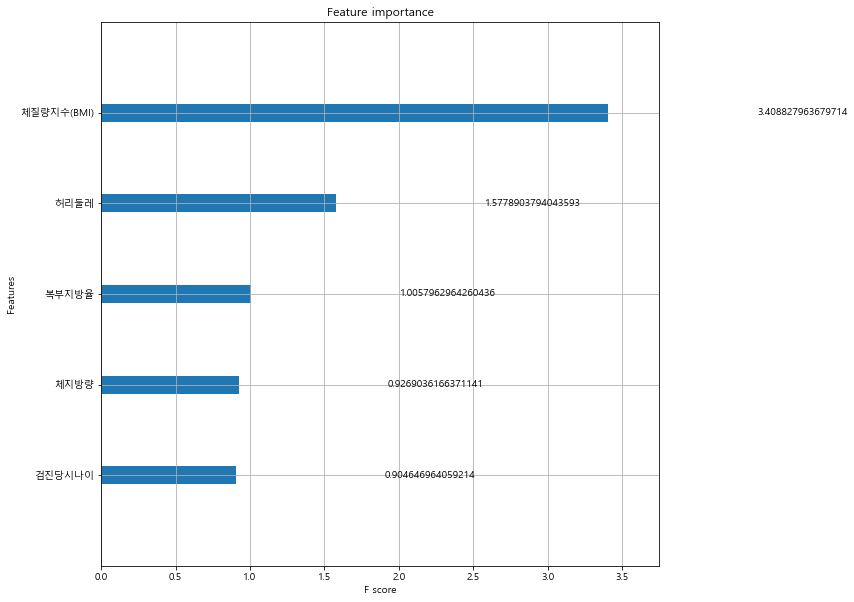

In [461]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model2, importance_type='gain')

In [462]:
model2.feature_importances_

array([0.11562365, 0.20167142, 0.435685  , 0.12855163, 0.11846828],
      dtype=float32)

In [463]:
df_feature2 = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model2.feature_importances_)], axis=1)
df_feature2.columns = ['columns', 'feature_importance']

In [464]:
df_feature2.sort_values('feature_importance', ascending=False)

,columns,feature_importance
2,체질량지수(BMI),0.435685
1,허리둘레,0.201671
3,복부지방율,0.128552
4,체지방량,0.118468
0,검진당시나이,0.115624


# 실제나이 - 예측나이 결과

In [465]:
df_test2 = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), pd.DataFrame(y_pred2).reset_index(drop=True)], axis=1)

In [466]:
df_test2.head()

,target,0
0,108.0,107.796677
1,102.0,102.601517
2,90.0,90.294113
3,100.0,99.789894
4,107.0,106.345444


In [467]:
df_test2.columns

Index(['target', 0], dtype='object')

In [468]:
df_test2.columns = ['실제지수', '예측지수']

In [469]:
df_test2['diff'] = df_test2['예측지수'] - df_test2['실제지수']

In [470]:
df_test2.head()

,실제지수,예측지수,diff
0,108.0,107.796677,-0.203323
1,102.0,102.601517,0.601517
2,90.0,90.294113,0.294113
3,100.0,99.789894,-0.210106
4,107.0,106.345444,-0.654556


In [471]:
df_test2['diff_int'] = df_test2['diff'].round(0)

In [472]:
len(df_test2)

120730

In [473]:
df_test2.head()

,실제지수,예측지수,diff,diff_int
0,108.0,107.796677,-0.203323,-0.0
1,102.0,102.601517,0.601517,1.0
2,90.0,90.294113,0.294113,0.0
3,100.0,99.789894,-0.210106,-0.0
4,107.0,106.345444,-0.654556,-1.0


<AxesSubplot:>

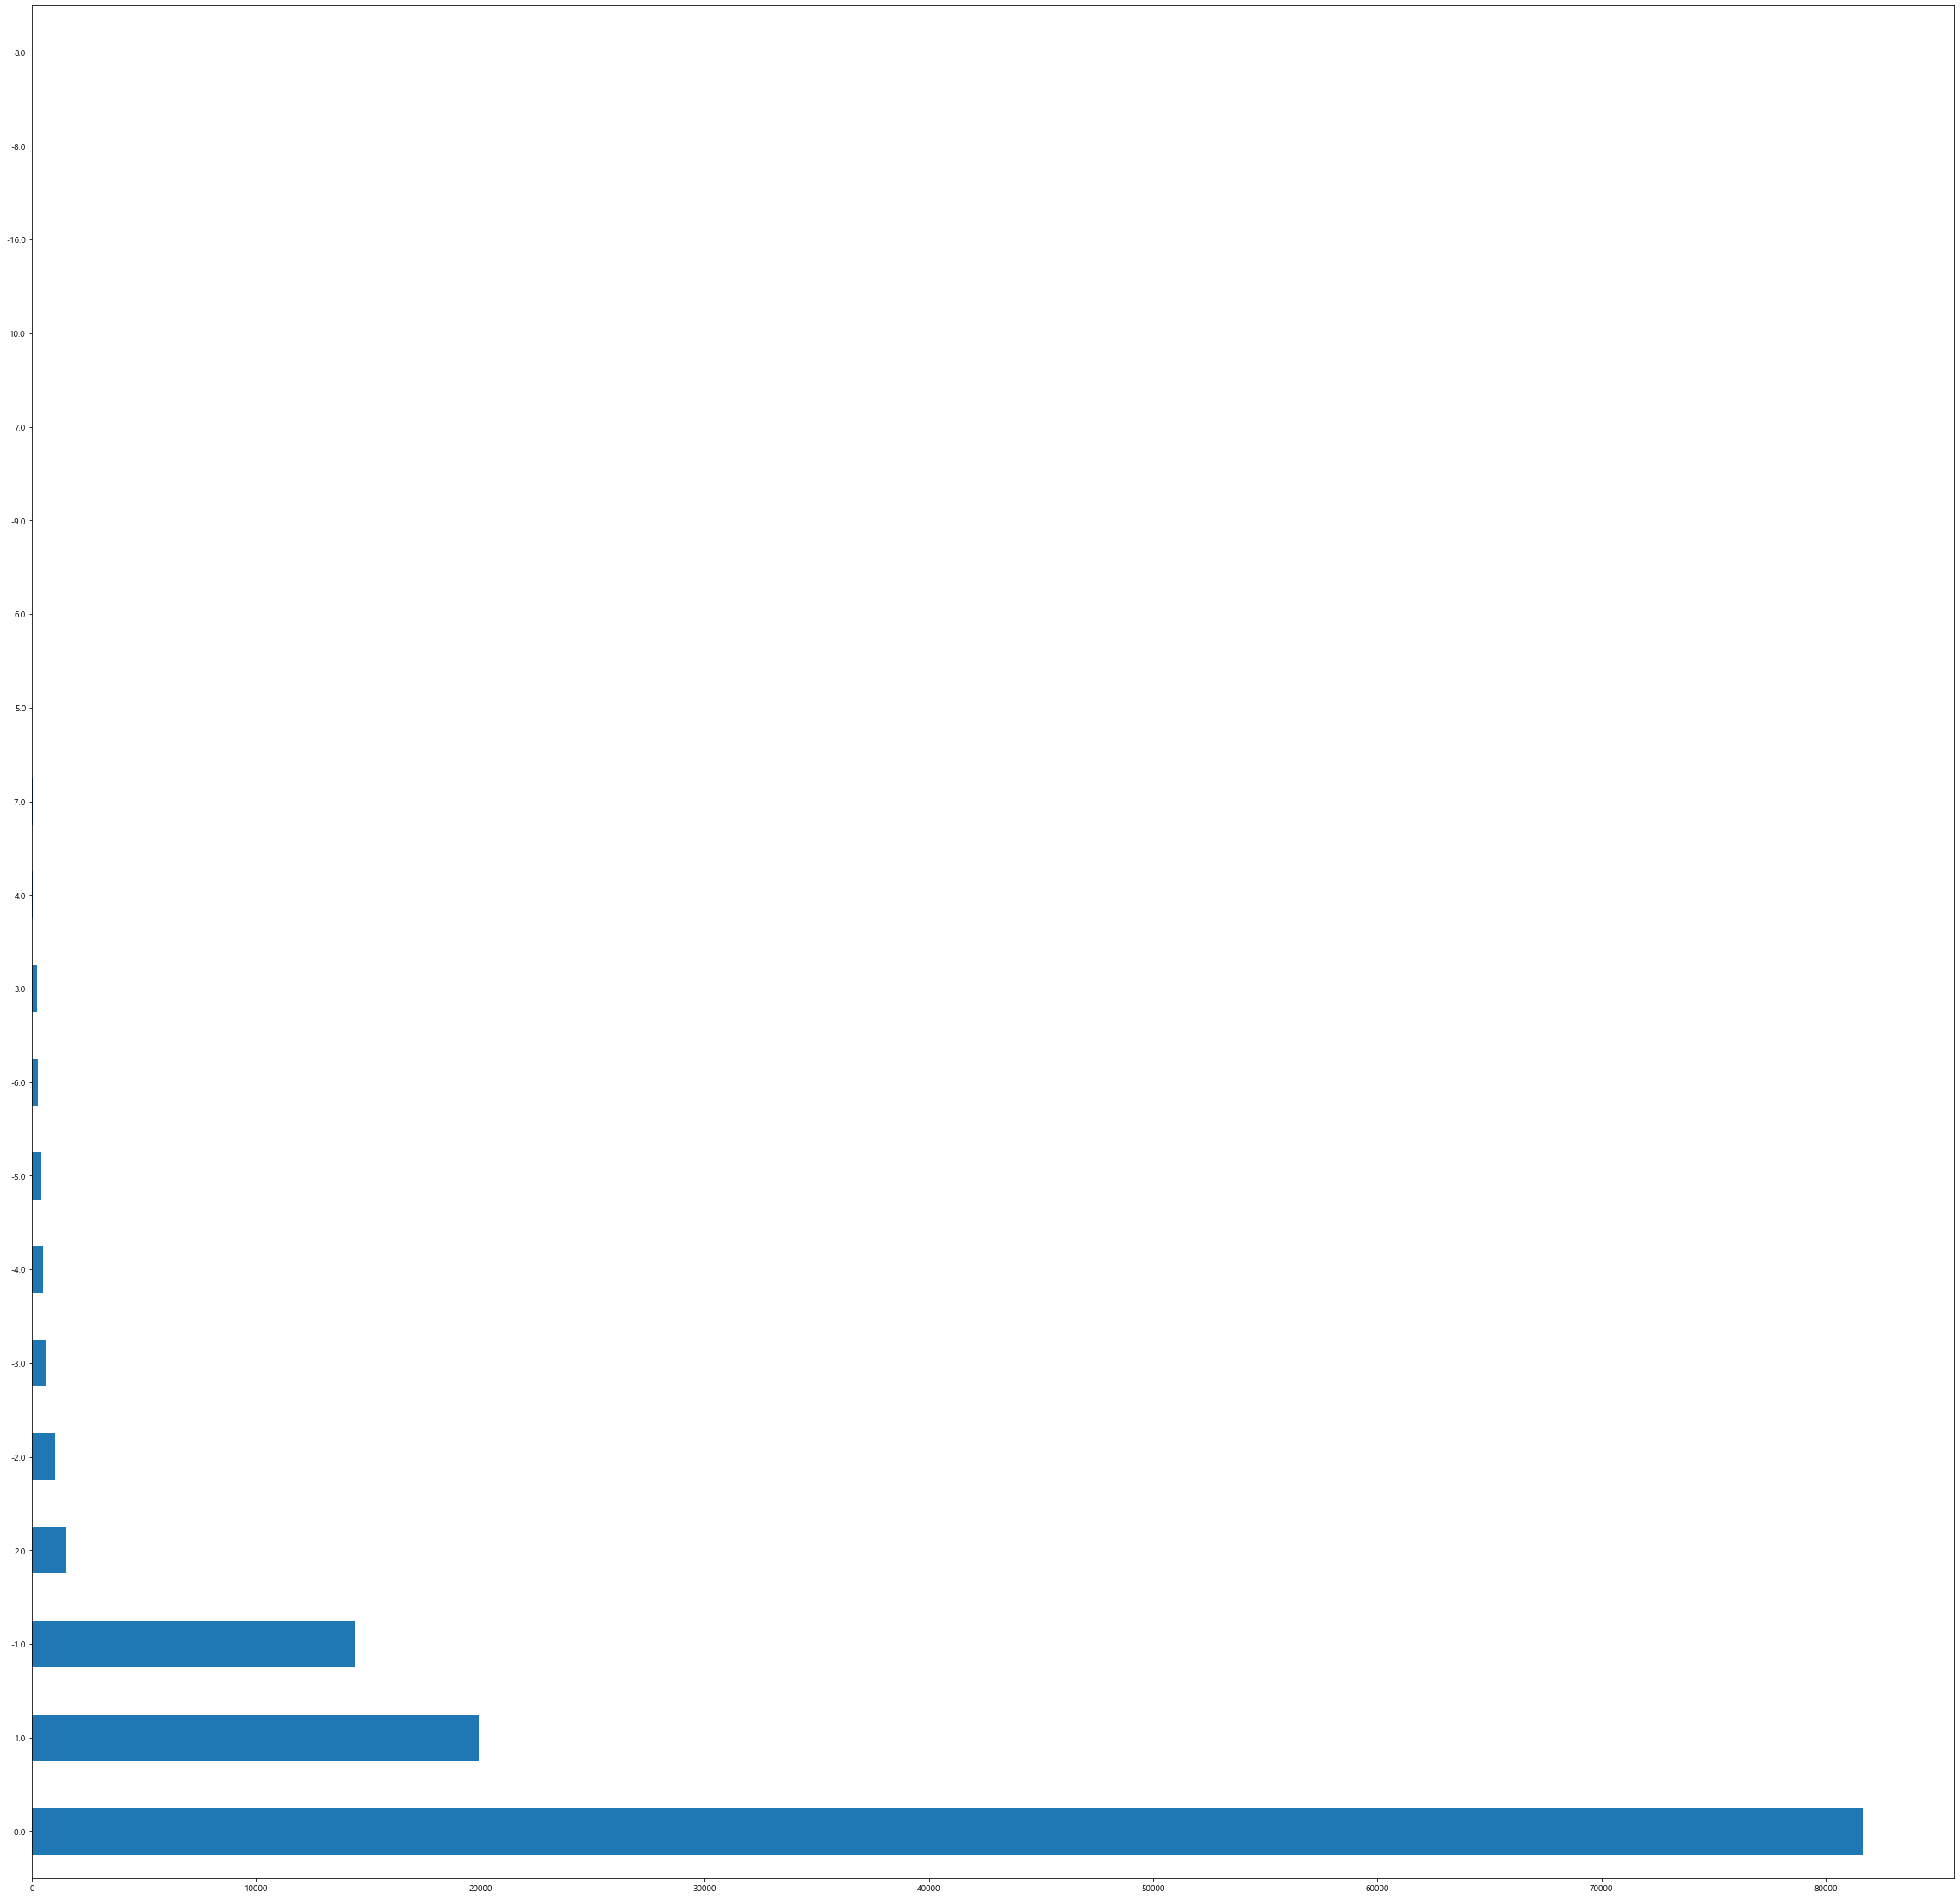

In [474]:
plt.figure(figsize=(40, 40))
df_test2['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_여자.png')

# 예측 나이 분포

In [475]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_train_pred2 = model2(X_train2)
        X_train_pred2 = X_train_pred2.numpy()

    df_train2 = pd.DataFrame(X_train_pred2).reset_index(drop=True)
    y_test2 = pd.DataFrame(y_test2.numpy())

In [476]:
if XGB_bool:
    df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [477]:
df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [478]:
df_train2.round(0).value_counts()

112.0    14812
89.0     14439
111.0    14422
88.0     13888
90.0     13568
106.0    13420
94.0     13246
110.0    13095
91.0     12609
109.0    12356
92.0     12127
105.0    11817
95.0     11748
108.0    11747
107.0    11476
93.0     11364
104.0    10552
96.0     10258
97.0      9930
103.0     9638
102.0     9390
98.0      9025
101.0     8626
99.0      8484
100.0     7874
113.0     4057
87.0      4016
86.0      3338
85.0      3127
115.0     3040
119.0     3022
114.0     2978
84.0      2963
116.0     2962
117.0     2944
120.0     2913
118.0     2861
83.0      2807
82.0      2797
80.0      2543
81.0      2539
79.0      2435
121.0     2371
77.0      2371
122.0     2331
78.0      2317
123.0     2005
76.0      1789
124.0     1392
75.0       667
125.0      581
73.0       524
72.0       515
74.0       508
70.0       487
71.0       478
68.0       447
69.0       433
66.0       347
67.0       339
65.0       316
64.0       173
63.0       113
61.0        76
60.0        61
62.0        56
59.0      

In [479]:
y_test2.value_counts()

88.0     5044
112.0    4998
89.0     4640
111.0    4638
106.0    4610
94.0     4550
90.0     4441
110.0    4380
91.0     4197
109.0    4126
108.0    4048
92.0     4014
105.0    3852
93.0     3740
95.0     3738
107.0    3722
104.0    3565
96.0     3563
103.0    3255
97.0     3186
98.0     3082
102.0    3068
99.0     2871
101.0    2781
100.0    2683
87.0     1107
113.0    1090
115.0    1088
114.0    1077
85.0     1056
86.0     1048
84.0     1032
116.0    1017
83.0      966
117.0     948
118.0     916
119.0     897
82.0      895
81.0      892
120.0     855
123.0     820
121.0     808
78.0      804
122.0     801
80.0      798
79.0      797
77.0      770
76.0      640
124.0     602
75.0      252
125.0     237
73.0      193
74.0      175
70.0      154
69.0      153
72.0      153
71.0      150
68.0      147
67.0      142
66.0      120
65.0       83
64.0       75
63.0       33
62.0       28
61.0       23
58.0       23
57.0       19
60.0       15
59.0       15
56.0       11
55.0        8
54.0  

In [480]:
df_plot = pd.DataFrame(y_test2.value_counts())

In [481]:
df_plot.columns = ['count']

In [482]:
df_plot.reset_index(inplace=True)

In [483]:
df_plot = df_plot.sort_values('index', ascending=True)

In [484]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

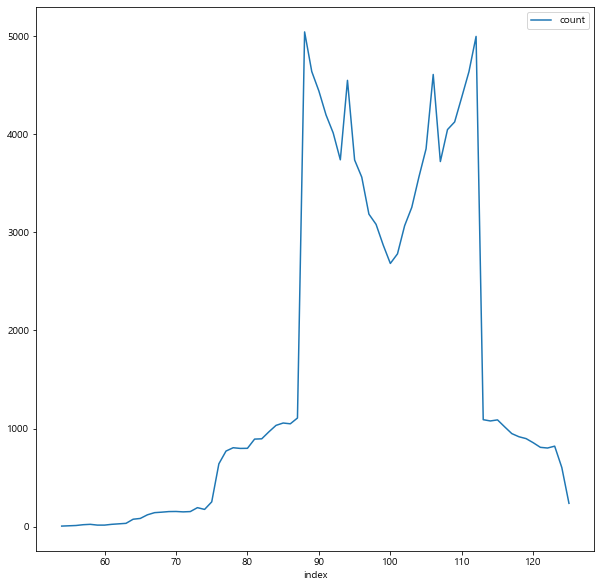

In [485]:
df_plot.plot()

In [486]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_test_pred2 = model2(X_test2)
        X_test_pred2 = X_test_pred2.numpy()
    df_test2 = pd.DataFrame(X_test_pred2).reset_index(drop=True)

In [487]:
if XGB_bool:
    df_test2 = pd.DataFrame(model2.predict(X_test2)).reset_index(drop=True)

In [488]:
df_test2.round(0).value_counts()

112.0    4890
89.0     4811
111.0    4768
88.0     4606
90.0     4524
106.0    4468
94.0     4376
110.0    4340
91.0     4264
109.0    4204
92.0     4100
105.0    3957
108.0    3899
95.0     3852
93.0     3825
107.0    3803
104.0    3604
96.0     3461
103.0    3225
97.0     3172
102.0    3155
98.0     3004
99.0     2840
101.0    2736
100.0    2665
113.0    1315
87.0     1311
86.0     1085
116.0    1025
85.0     1018
115.0    1013
119.0    1006
114.0     996
83.0      993
118.0     991
84.0      984
117.0     973
120.0     936
81.0      882
82.0      881
122.0     870
78.0      805
79.0      798
121.0     795
80.0      789
77.0      773
123.0     659
76.0      634
124.0     474
75.0      262
73.0      194
125.0     190
74.0      162
68.0      157
71.0      155
67.0      155
72.0      147
70.0      144
69.0      141
66.0      117
65.0       98
64.0       56
63.0       32
61.0       32
62.0       29
58.0       22
60.0       17
59.0       16
56.0       14
57.0       13
55.0        9
127.0 

In [489]:
df_plot2 = pd.DataFrame(df_test2.round(0).value_counts())

In [490]:
df_plot2.columns = ['count']

In [491]:
df_plot2.reset_index(inplace=True)

In [492]:
df_plot2

,0,count
0,112.0,4890
1,89.0,4811
2,111.0,4768
3,88.0,4606
4,90.0,4524
5,106.0,4468
6,94.0,4376
7,110.0,4340
8,91.0,4264
9,109.0,4204


In [493]:
df_plot2 = df_plot2.sort_values(0, ascending=True)

In [494]:
df_plot2.set_index(0, inplace=True)

In [495]:
df_plot2

,count
0,
54.0,3
55.0,9
56.0,14
57.0,13
58.0,22
59.0,16
60.0,17
61.0,32
62.0,29


<AxesSubplot:xlabel='0'>

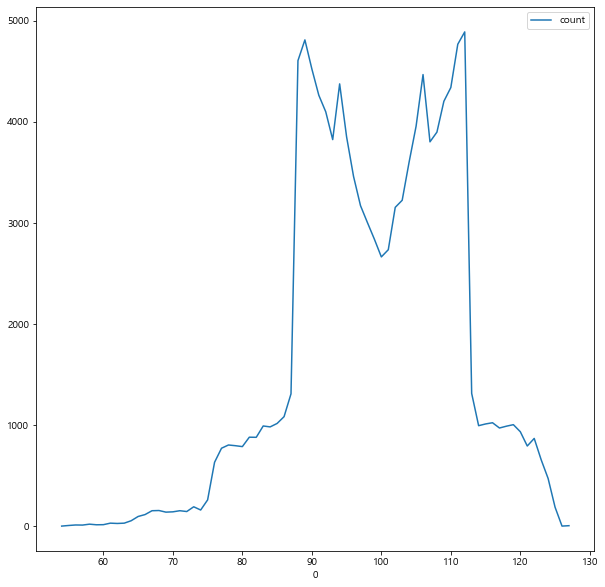

In [496]:
df_plot2.plot()

# 시각화

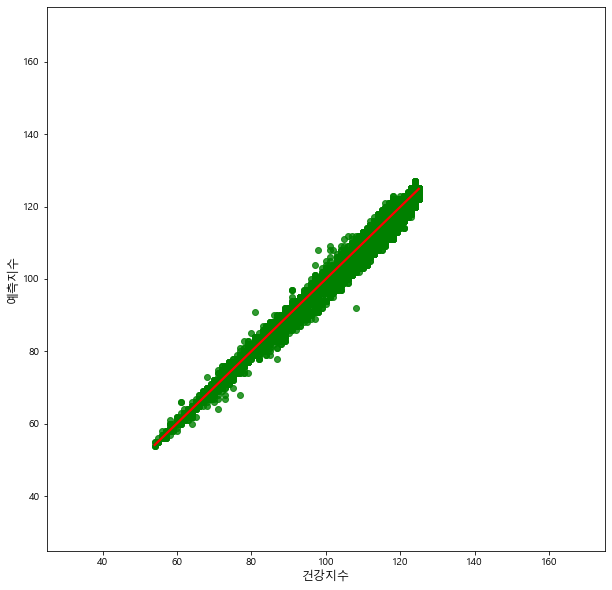

In [497]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), df_test2.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 여성 데이터 전체 계산

In [498]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target
0,2022,48,1140655,2,34,77.0,26.00,0.85,17.39,81.48,28.77,100.00,100.0,77.56,89.0
1,2023,48,2484053,2,35,88.0,21.78,0.85,17.39,17.05,100.00,100.00,100.0,79.26,90.0
2,2021,53,2632765,2,26,76.0,23.20,0.89,17.39,56.63,50.48,35.11,100.0,60.56,80.0
3,2023,53,2632764,2,28,72.0,23.40,0.85,17.39,122.83,56.45,100.00,100.0,94.82,97.0
4,2024,53,2658222,2,29,72.0,22.60,0.87,17.39,101.94,72.98,74.78,100.0,87.43,94.0


In [499]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363687 entries, 0 to 363686
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   검진년도            363687 non-null  int64  
 1   UID             363687 non-null  int64  
 2   CU_REC_ID       363687 non-null  int64  
 3   SEX             363687 non-null  int64  
 4   검진당시나이          363687 non-null  int64  
 5   허리둘레            363687 non-null  float64
 6   체질량지수(BMI)      363687 non-null  float64
 7   복부지방율           363687 non-null  float64
 8   체지방량            363687 non-null  float64
 9   허리둘레_kde        363687 non-null  float64
 10  체질량지수(BMI)_kde  363687 non-null  float64
 11  복부지방율_kde       363687 non-null  float64
 12  체지방량_kde        363687 non-null  float64
 13  kde_mean        363687 non-null  float64
 14  target          363687 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 41.6 MB


In [500]:
df_woman[df_woman['UID'] == 196909]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target
78080,2021,196909,2495703,2,28,66.6,18.5,0.85,17.39,149.80,105.56,100.00,100.0,113.84,107.0
78081,2022,196909,2495702,2,29,68.0,18.3,0.85,17.39,148.05,104.09,111.90,100.0,116.01,108.0
78082,2023,196909,2495700,2,30,68.0,18.6,0.82,17.39,149.98,117.64,150.00,100.0,129.40,115.0
78083,2024,196909,2495697,2,31,69.0,19.6,0.85,17.39,145.73,147.13,126.41,100.0,129.82,115.0


In [501]:
if scaling_bool:
    df_pred2 = df_woman_scaled.copy()
else:
    df_pred2 = df_woman.copy()

In [502]:
len(df_pred2)

363687

In [503]:
df_pred2.reset_index(drop=True, inplace=True)

In [504]:
X_test2

,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량
273586,48,67.0,21.90,0.85,17.39
204841,49,68.0,19.44,0.85,17.39
163305,26,81.5,21.78,0.85,17.39
2946,27,59.0,19.68,0.85,17.39
85152,38,65.0,19.60,0.85,17.39
...,...,...,...,...,...
262374,31,63.0,17.70,0.85,17.39
18666,40,78.5,23.80,0.85,17.39
170735,21,69.4,22.60,0.85,17.39
55834,25,70.1,21.40,0.85,17.39


In [505]:
df_pred2.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '허리둘레', '체질량지수(BMI)',
       '복부지방율', '체지방량', '허리둘레_kde', '체질량지수(BMI)_kde', '복부지방율_kde', '체지방량_kde',
       'kde_mean', 'target'],
      dtype='object')

In [506]:
df_pred2[train_columns]

,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량
0,34,77.0,26.00,0.85,17.39
1,35,88.0,21.78,0.85,17.39
2,26,76.0,23.20,0.89,17.39
3,28,72.0,23.40,0.85,17.39
4,29,72.0,22.60,0.87,17.39
...,...,...,...,...,...
363682,60,79.0,22.50,0.85,17.39
363683,62,74.0,20.70,0.85,17.39
363684,56,62.0,19.80,0.82,17.39
363685,30,68.2,19.60,0.85,17.39


In [507]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        pred_data2 = model2(torch.Tensor(df_pred2[train_columns].to_numpy()))
        pred_data2 = pred_data2.numpy()

In [508]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_pred2[train_columns])

In [509]:
pred_data2

array([ 88.6483  ,  89.50552 ,  81.30098 , ...,  89.583534, 112.55517 ,
       108.253624], dtype=float32)

In [510]:
df_output2 = pd.concat([df_pred2, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [511]:
if scaling_bool:
    df_output2 = pd.concat([df_woman[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output2], axis=1)

In [512]:
df_output2.head(10)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target,예측지수
0,2022,48,1140655,2,34,77.0,26.00,0.85,17.39,81.48,28.77,100.00,100.00,77.56,89.0,88.648300
1,2023,48,2484053,2,35,88.0,21.78,0.85,17.39,17.05,100.00,100.00,100.00,79.26,90.0,89.505524
2,2021,53,2632765,2,26,76.0,23.20,0.89,17.39,56.63,50.48,35.11,100.00,60.56,80.0,81.300980
3,2023,53,2632764,2,28,72.0,23.40,0.85,17.39,122.83,56.45,100.00,100.00,94.82,97.0,96.772408
4,2024,53,2658222,2,29,72.0,22.60,0.87,17.39,101.94,72.98,74.78,100.00,87.43,94.0,93.996201
5,2020,54,497669,2,30,75.0,22.70,0.85,19.10,78.25,80.16,100.00,77.56,83.99,92.0,92.625633
6,2022,54,1319859,2,32,79.0,25.14,0.85,17.39,54.22,35.72,100.00,100.00,72.48,86.0,86.266212
7,2023,54,2039511,2,33,89.7,24.37,0.85,17.39,9.88,47.19,100.00,100.00,64.27,82.0,82.584511
8,2024,54,2750990,2,34,77.0,24.80,0.85,23.90,81.48,38.15,100.00,57.47,69.28,85.0,87.624580
9,2019,56,1605927,2,30,64.0,18.90,0.85,17.39,116.75,131.93,100.00,100.00,112.17,106.0,106.303467


## 예측지수 성능평가

In [513]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['target'], df_output2['예측지수'])

0.4902570430833223

# target으로 나이 계산

In [514]:
df_output2['예측나이'] = ((100 - df_output2['예측지수']) / 5) + df_output2['검진당시나이']
df_output2['예측나이'] = df_output2['예측나이'].round(2)

In [515]:
df_output2.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target,예측지수,예측나이
0,2022,48,1140655,2,34,77.0,26.00,0.85,17.39,81.48,28.77,100.00,100.00,77.56,89.0,88.648300,36.27
1,2023,48,2484053,2,35,88.0,21.78,0.85,17.39,17.05,100.00,100.00,100.00,79.26,90.0,89.505524,37.10
2,2021,53,2632765,2,26,76.0,23.20,0.89,17.39,56.63,50.48,35.11,100.00,60.56,80.0,81.300980,29.74
3,2023,53,2632764,2,28,72.0,23.40,0.85,17.39,122.83,56.45,100.00,100.00,94.82,97.0,96.772408,28.65
4,2024,53,2658222,2,29,72.0,22.60,0.87,17.39,101.94,72.98,74.78,100.00,87.43,94.0,93.996201,30.20
5,2020,54,497669,2,30,75.0,22.70,0.85,19.10,78.25,80.16,100.00,77.56,83.99,92.0,92.625633,31.47
6,2022,54,1319859,2,32,79.0,25.14,0.85,17.39,54.22,35.72,100.00,100.00,72.48,86.0,86.266212,34.75
7,2023,54,2039511,2,33,89.7,24.37,0.85,17.39,9.88,47.19,100.00,100.00,64.27,82.0,82.584511,36.48
8,2024,54,2750990,2,34,77.0,24.80,0.85,23.90,81.48,38.15,100.00,57.47,69.28,85.0,87.624580,36.48
9,2019,56,1605927,2,30,64.0,18.90,0.85,17.39,116.75,131.93,100.00,100.00,112.17,106.0,106.303467,28.74


## 예측나이 성능평가

In [516]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['검진당시나이'], df_output2['예측나이'])

1.8089395826631143

# 최종 산출

In [517]:
df_output2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,허리둘레_kde,체질량지수(BMI)_kde,복부지방율_kde,체지방량_kde,kde_mean,target,예측지수,예측나이
0,2022,48,1140655,2,34,77.0,26.00,0.85,17.39,81.48,28.77,100.00,100.0,77.56,89.0,88.648300,36.27
1,2023,48,2484053,2,35,88.0,21.78,0.85,17.39,17.05,100.00,100.00,100.0,79.26,90.0,89.505524,37.10
2,2021,53,2632765,2,26,76.0,23.20,0.89,17.39,56.63,50.48,35.11,100.0,60.56,80.0,81.300980,29.74
3,2023,53,2632764,2,28,72.0,23.40,0.85,17.39,122.83,56.45,100.00,100.0,94.82,97.0,96.772408,28.65
4,2024,53,2658222,2,29,72.0,22.60,0.87,17.39,101.94,72.98,74.78,100.0,87.43,94.0,93.996201,30.20


# DataMart csv

In [518]:
df_copy = df.copy()

In [519]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량
0,2010,7282,2520,1,42,NaN,NaN,NaN,NaN
1,2010,7490,3638,1,39,NaN,NaN,NaN,NaN
2,2010,7915,3997,1,36,NaN,NaN,NaN,NaN
3,2010,8056,4745,1,42,80.0,NaN,NaN,NaN
4,2010,8457,3929,1,38,NaN,NaN,NaN,NaN


In [520]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   검진년도        1213899 non-null  int64  
 1   UID         1213899 non-null  int64  
 2   CU_REC_ID   1213899 non-null  int64  
 3   SEX         1213899 non-null  int64  
 4   검진당시나이      1213899 non-null  int64  
 5   허리둘레        1148453 non-null  float64
 6   체질량지수(BMI)  1162058 non-null  float64
 7   복부지방율       265769 non-null   float64
 8   체지방량        256065 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 83.4 MB


In [521]:
minimums

[49.75, 14.214999999999995, 0.7199999999999999, 1.7500000000000018]

In [522]:
maximums

[111.75, 33.37500000000001, 1.04, 34.15]

In [523]:
train_columns

['검진당시나이', '허리둘레', '체질량지수(BMI)', '복부지방율', '체지방량']

In [524]:
target_cols

['허리둘레', '체질량지수(BMI)', '복부지방율', '체지방량']

In [525]:
for idx, col in enumerate(target_cols):
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [526]:
df_woman_csv = df_copy[df_copy['SEX'] == 2]
len(df_woman_csv)

448440

In [527]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량
10,2010,15894,2533,2,29,68.0,19.4,NaN,NaN
22,2010,42223,1364,2,24,70.0,18.2,NaN,NaN
37,2011,364096,6645,2,32,59.0,17.0,NaN,8.7
45,2010,120518,3595,2,30,NaN,24.1,NaN,NaN
63,2011,698706,6600,2,36,NaN,NaN,NaN,NaN


## 검진 항목 all 결측치 지우기

In [528]:
target_cols

['허리둘레', '체질량지수(BMI)', '복부지방율', '체지방량']

In [529]:
df_woman_csv.dropna(subset=target_cols, how='all', inplace=True)

In [530]:
df_woman_csv.reset_index(drop=True, inplace=True)

In [531]:
len(df_woman_csv)

440203

## fillna

In [532]:
df_woman.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '허리둘레', '체질량지수(BMI)',
       '복부지방율', '체지방량', '허리둘레_kde', '체질량지수(BMI)_kde', '복부지방율_kde', '체지방량_kde',
       'kde_mean', 'target'],
      dtype='object')

In [533]:
df_woman_csv.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '허리둘레', '체질량지수(BMI)',
       '복부지방율', '체지방량'],
      dtype='object')

In [534]:
df_woman_csv.fillna(df_woman.mean().round(2), inplace=True)

## 스크리닝

In [535]:
# screening = 80

In [536]:
# scr_col = 'ALP'

In [537]:
# df_woman_csv[df_woman_csv[scr_col] < screening].head()

In [538]:
# len(df_woman_csv[df_woman_csv[scr_col] < screening])

In [539]:
# df_woman_csv.loc[df_woman_csv[scr_col] < screening, scr_col] = screening

In [540]:
# df_woman_csv[df_woman_csv[scr_col] < screening].head()

In [541]:
# len(df_woman_csv[df_woman_csv[scr_col] < screening])

In [542]:
# len(df_woman_csv)

## 모델 예측

In [543]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_woman_csv[train_columns])

In [544]:
pred_data2 = pred_data2.round(0)

In [545]:
df_woman_csv = pd.concat([df_woman_csv, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [546]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,예측지수
0,2010,15894,2533,2,29,68.00,19.4,0.85,17.41,114.0
1,2010,42223,1364,2,24,70.00,18.2,0.85,17.41,106.0
2,2011,364096,6645,2,32,59.00,17.0,0.85,8.70,79.0
3,2010,120518,3595,2,30,72.47,24.1,0.85,17.41,94.0
4,2012,13658,10439,2,31,72.00,19.5,0.85,17.41,111.0


### 성능 평가

In [547]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_woman_csv['target'], df_woman_csv['예측지수']))

In [548]:
# r2_score(df_woman_csv['target'], df_woman_csv['예측지수'])

## 예측나이 계산

In [549]:
df_woman_csv['예측나이'] = ((100 - df_woman_csv['예측지수']) / 5) + df_woman_csv['검진당시나이']
df_woman_csv['예측나이'] = df_woman_csv['예측나이'].round(2)

### 성능 평가

In [550]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_woman_csv['검진당시나이'], df_woman_csv['예측나이']))

MAE : 2.18319729761042


In [551]:
r2_score(df_woman_csv['검진당시나이'], df_woman_csv['예측나이'])

0.9097982638960186

In [552]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,예측지수,예측나이
0,2010,15894,2533,2,29,68.00,19.4,0.85,17.41,114.0,26.2
1,2010,42223,1364,2,24,70.00,18.2,0.85,17.41,106.0,22.8
2,2011,364096,6645,2,32,59.00,17.0,0.85,8.70,79.0,36.2
3,2010,120518,3595,2,30,72.47,24.1,0.85,17.41,94.0,31.2
4,2012,13658,10439,2,31,72.00,19.5,0.85,17.41,111.0,28.8


In [553]:
df_woman_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440203 entries, 0 to 440202
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   검진년도        440203 non-null  int64  
 1   UID         440203 non-null  int64  
 2   CU_REC_ID   440203 non-null  int64  
 3   SEX         440203 non-null  int64  
 4   검진당시나이      440203 non-null  int64  
 5   허리둘레        440203 non-null  float64
 6   체질량지수(BMI)  440203 non-null  float64
 7   복부지방율       440203 non-null  float64
 8   체지방량        440203 non-null  float64
 9   예측지수        440203 non-null  float32
 10  예측나이        440203 non-null  float64
dtypes: float32(1), float64(5), int64(5)
memory usage: 35.3 MB


# 최종 UID별 확인

In [554]:
# 성윤..
df_woman_csv[df_woman_csv['UID'] == 261581].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,예측지수,예측나이
122470,2021,261581,806568,2,50,70.6,20.8,0.88,17.41,120.0,46.0
122479,2021,261581,2243879,2,50,70.6,20.8,0.88,17.41,120.0,46.0
122480,2021,261581,2418909,2,50,70.6,20.8,0.88,17.41,120.0,46.0
122481,2021,261581,2418910,2,50,70.6,20.8,0.88,17.41,120.0,46.0
186599,2022,261581,751339,2,51,76.0,22.0,0.88,17.41,125.0,46.0
186602,2022,261581,2243878,2,51,76.0,22.0,0.88,17.41,125.0,46.0
281091,2023,261581,1519764,2,52,72.0,21.8,0.89,17.41,124.0,47.2
281092,2023,261581,2243877,2,52,72.0,21.8,0.89,17.41,124.0,47.2
405631,2024,261581,2418911,2,53,71.0,20.7,0.87,17.41,123.0,48.4


In [555]:
# 차종..
df_woman_csv[df_woman_csv['UID'] == 477944].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,예측지수,예측나이
64467,2022,477944,956268,2,31,73.0,18.6,0.80,17.41,107.0,29.6
219282,2022,477944,2212776,2,31,73.0,18.6,0.80,17.41,107.0,29.6
327082,2023,477944,1454346,2,32,70.0,18.2,0.78,17.41,101.0,31.8
327083,2023,477944,2212775,2,32,70.0,18.2,0.78,17.41,101.0,31.8
417980,2024,477944,2362855,2,33,64.0,17.2,0.80,17.41,100.0,33.0


In [556]:
# 성혜빈
df_woman_csv[df_woman_csv['UID'] == 896916].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,예측지수,예측나이
353014,2023,896916,1459636,2,28,68.0,21.0,0.82,17.41,120.0,24.0
353003,2023,896916,1842092,2,28,68.0,21.0,0.82,17.41,120.0,24.0
353015,2023,896916,2031853,2,28,68.0,21.0,0.82,17.41,120.0,24.0
353016,2023,896916,2253054,2,28,68.0,21.0,0.82,17.41,120.0,24.0
347000,2023,896916,2257188,2,28,68.0,21.0,0.82,17.41,120.0,24.0
428899,2024,896916,2253058,2,29,68.0,21.0,0.81,17.41,118.0,25.4


# 최종 CSV 병합 Extract

In [557]:
len(df_man_csv)

752584

In [558]:
len(df_woman_csv)

440203

In [559]:
df_csv = pd.concat([df_man_csv, df_woman_csv])

In [560]:
df_csv.to_csv(csv_path)